# Air Quality Analysis and Prediction in Tamil Nadu

**Problem Definition:** The project aims to analyze and visualize air quality data from monitoring stations in Tamil Nadu. The objective is to gain insights into air pollution trends, identify areas with high pollution levels, and develop a predictive model to estimate RSPM/PM10 levels based on SO2 and NO2 levels. This project involves defining objectives, designing the analysis approach, selecting visualization techniques, and creating a predictive model using Python and relevant libraries.



## Project Objectives:
- Analyze the air quality in Tamil Nadu.
- Examine the changes in air quality over time.
- Extract insights from the data.
- Predict future trends in air quality and RSPM/PM10 levels based on SO2 & NO2 Levels.

## Analysis Approach:
 1) Clean and preprocess the data.
    1) Drop unwanted columns such as stn Code, State, etc...
    2) Change the Sampling Date data type to datetime object.
    3) Rename the Column names (Removing spaces & capital letters)
    4) Group the data by Area
 3) Conduct EDA on the data.
    1) Perform Various Visulizations of the Data
    2) Extract insights from the data.
 6) Build a predictive model.
    1) Pick Machine Learning Models based on the extracted insights and train and test them with the data.
 8) Present the results, insights, and findings.

## Visualization Selection
 - Overall Data Distributions of SO2, NO2 & RSPM/PM10 (Using Violin Chart)
 - Histogram to Visualize the frequency distribution of pollutant levels
 - Data Distribution of Every Area and location type by Month (Using Violin Chart)
 - Data Distribution of Every Area and location type by Weekdays (Using Violin Chart)
 - Line chart of SO2, NO2, & PM10 in Every Area and Location Type, With Important Holidays Marked
 - Heat Map of Correlations between SO2, NO2 & PM10.
 - Regression Plots of SO2, NO2 & PM10 for every Area and Location Type.
 - Visualizing Spatial Air Quality Distribution in Tamil Nadu Using Heatmaps.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from collections import defaultdict


# 1) Data Preprocess

In [2]:
data = pd.read_csv("tn-aq-2014.csv")
print(data.shape)
data.head()

(2879, 11)


Stn Code Sampling Date       State City/Town/Village/Area  \
0        38      01-02-14  Tamil Nadu                Chennai   
1        38      01-07-14  Tamil Nadu                Chennai   
2        38      21-01-14  Tamil Nadu                Chennai   
3        38      23-01-14  Tamil Nadu                Chennai   
4        38      28-01-14  Tamil Nadu                Chennai   

                     Location of Monitoring Station  \
0  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
1  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
2  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
3  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
4  Kathivakkam, Municipal Kalyana Mandapam, Chennai   

                                    Agency Type of Location   SO2   NO2  \
0  Tamilnadu State Pollution Control Board  Industrial Area  11.0  17.0   
1  Tamilnadu State Pollution Control Board  Industrial Area  13.0  17.0   
2  Tamilnadu State Pollution Control Board  Industrial Area  12.0  18.0   
3  Tamilnadu State Pollution Control Board  Industrial Area  15.0  16.0   
4  Tamilnadu State Pollution Control Board  Industrial Area  13.0  14.0   

   RSPM/PM10  PM 2.5  
0       55.0     NaN  
1       45.0     NaN  
2       50.0     NaN  
3       46.0     NaN  
4       42.0     NaN

In [3]:
data.describe()

Stn Code          SO2          NO2    RSPM/PM10  PM 2.5
count  2879.000000  2868.000000  2866.000000  2875.000000     0.0
mean    475.750261    11.503138    22.136776    62.494261     NaN
std     277.675577     5.051702     7.128694    31.368745     NaN
min      38.000000     2.000000     5.000000    12.000000     NaN
25%     238.000000     8.000000    17.000000    41.000000     NaN
50%     366.000000    12.000000    22.000000    55.000000     NaN
75%     764.000000    15.000000    25.000000    78.000000     NaN
max     773.000000    49.000000    71.000000   269.000000     NaN

In [4]:
data = data.drop(columns=["Stn Code", "State", "Location of Monitoring Station","Agency","PM 2.5"])
data["Sampling Date"] = pd.to_datetime(data["Sampling Date"])
data.columns = ["date","area","loctype","SO2","NO2","RSPM/PM10"]

In [5]:
unique_areas = data["area"].unique()
unique_loctyp  = data["loctype"].unique()
print("Areas:",unique_areas)
print("Type of locations:", unique_loctyp)

Areas: ['Chennai' 'Coimbatore' 'Cuddalore' 'Madurai' 'Mettur' 'Salem'
 'Thoothukudi' 'Trichy']
Type of locations: ['Industrial Area' 'Residential, Rural and other Areas']


In [6]:
data_by_area = {area_name: area_data.drop("area",axis=1).sort_values("date") for area_name, area_data in data.groupby("area")}

# 2) Exploratory Data Analysis
**$\text{SO}_2$ (Sulfur Dioxide)**:
- Colorless gas with a pungent odor.
- It is produced by burning fossil fuels containing sulfur, such as coal and oil.
- It can lead to respiratory problems and contribute to the formation of acid rain.

**$\text{NO}_2$ (Nitrogen Dioxide)**:
- Reddish-brown gas that forms when nitrogen oxides (NOx) react with the atmosphere.
- It is primarily released from combustion processes in vehicles and industrial activities.
- It contribute to respiratory issues and the formation of ground-level ozone, which is harmful to health.

**RSPM/PM10 (Respirable Suspended Particulate Matter/Particulate Matter with a diameter of 10 micrometers or less)**:
- Tiny solid or liquid particles suspended in the air with a diameter of 10 micrometers or less.
- These particles can come from various sources, including dust, vehicle emissions, construction activities, and industrial processes.
- RSPM/PM10 can be inhaled into the lungs, leading to respiratory problems and other health issues.

UNIT OF MEASUREMENT: $\mu g/m^3$ (**micrograms per cubic meter**)




In [7]:
# Color Scheme
so2_color = "#EBCB8B"
no2_color = "#BF616A"
pm10_color = "#4C566A"

## Overall Data Distributions of SO2, NO2 & RSPM/PM10

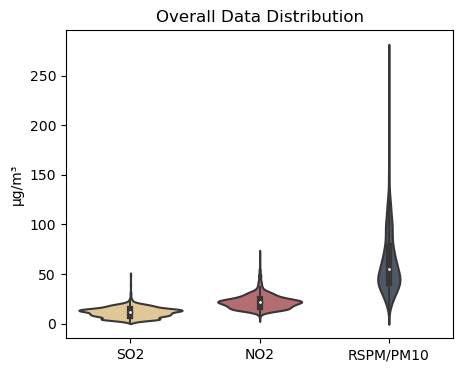

In [8]:
fig = plt.figure(figsize=(5,4))
sns.violinplot(data,palette=[so2_color,no2_color,pm10_color])
plt.ylabel("µg/m³")
plt.title("Overall Data Distribution")
plt.show()

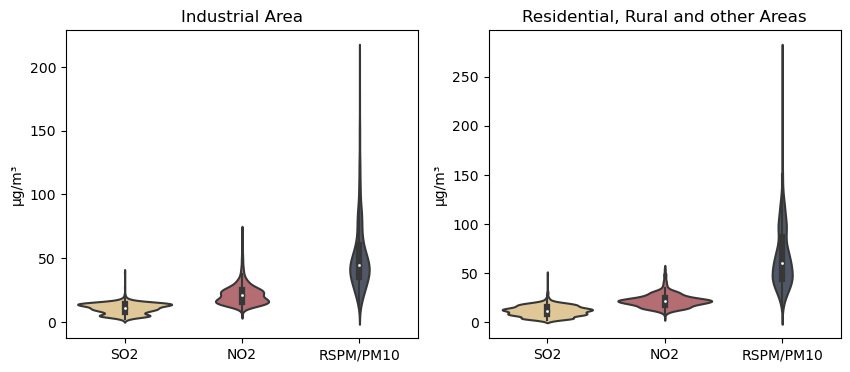

In [9]:
fig = plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    sns.violinplot(data[data["loctype"]==unique_loctyp[i]],palette=[so2_color,no2_color,pm10_color])
    plt.ylabel("µg/m³")
    plt.title(unique_loctyp[i])
plt.show()

## Frequency distribution of SO2, NO2 & PM10

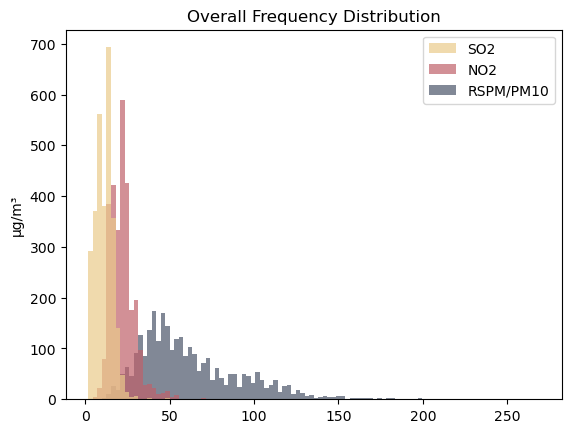

In [10]:
sns.histplot(data,bins=100,palette=[so2_color,no2_color,pm10_color],alpha=0.7, linewidth=0)
plt.ylabel("µg/m³")
plt.title("Overall Frequency Distribution")
plt.show()

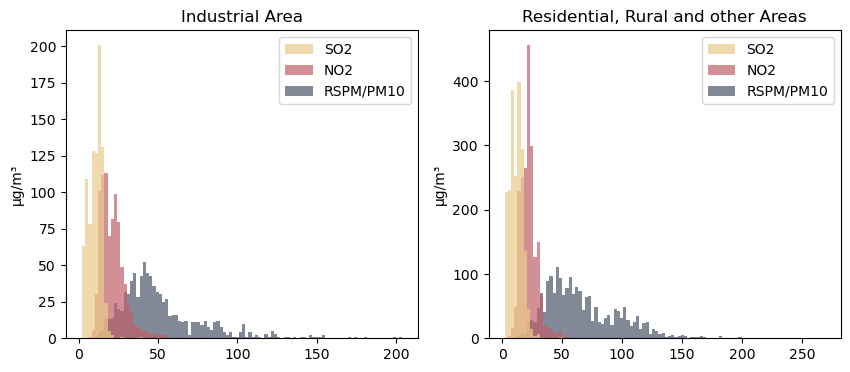

In [11]:
fig = plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    sns.histplot(data[data["loctype"]==unique_loctyp[i]],bins=100,palette=[so2_color,no2_color,pm10_color],alpha=0.7, linewidth=0)
    plt.title(unique_loctyp[i])
    plt.ylabel("µg/m³")
plt.show()

## Data Distribution of Every Area and location type by Month

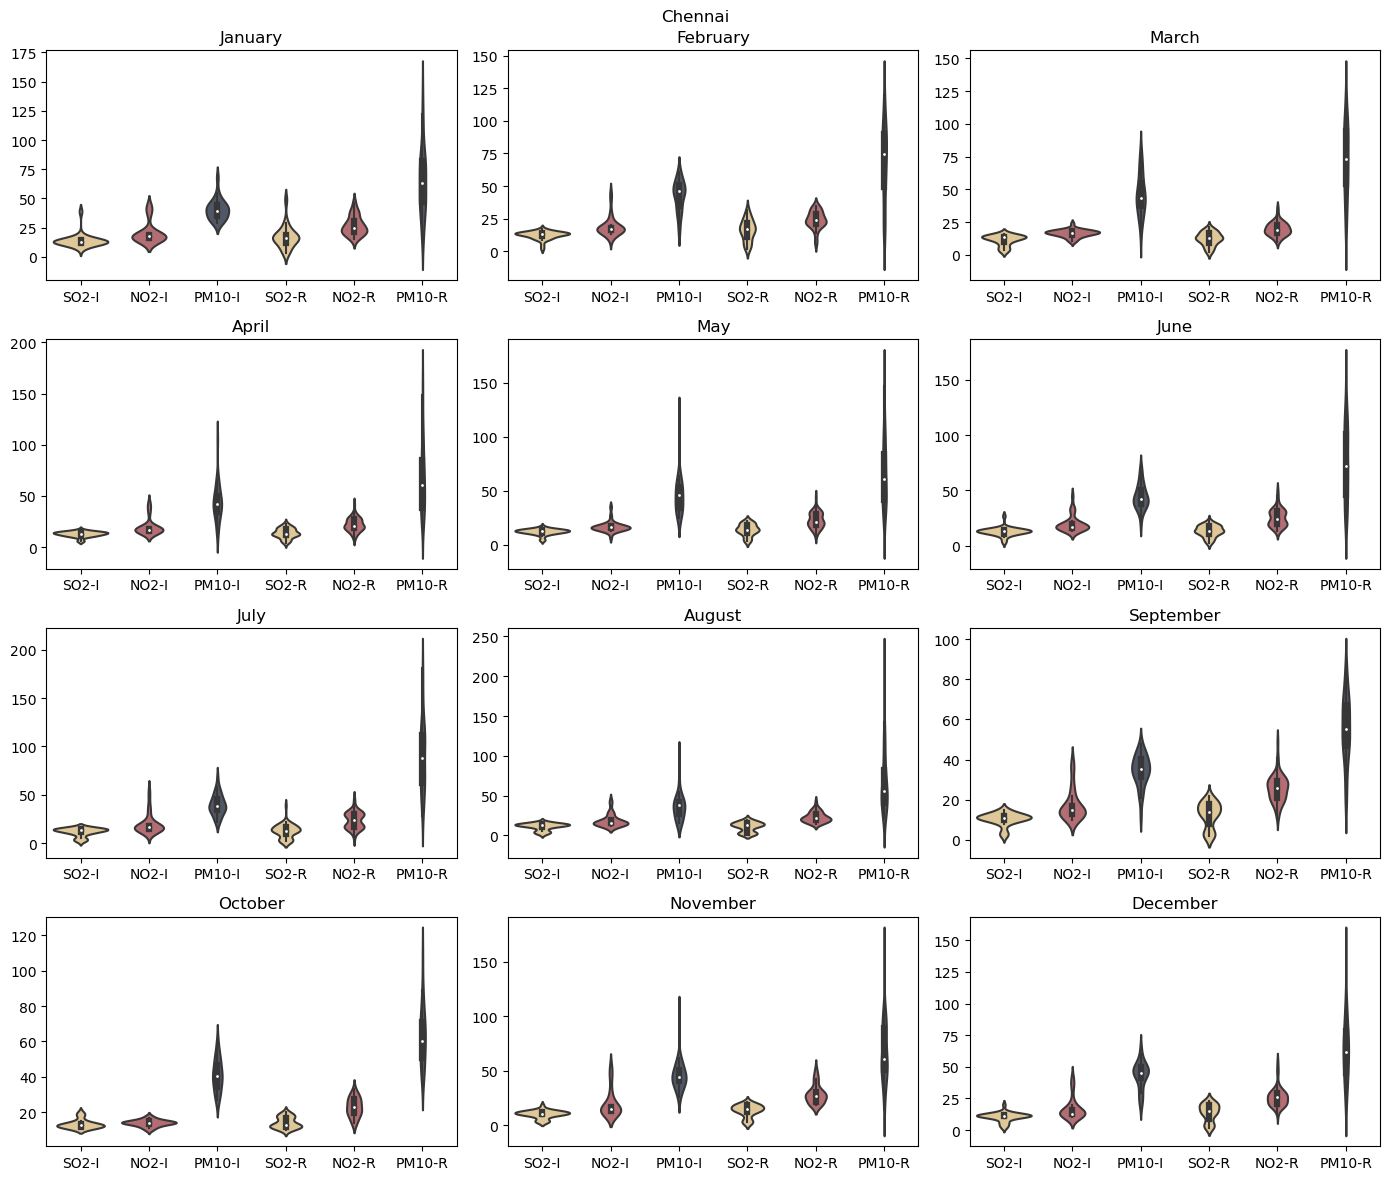

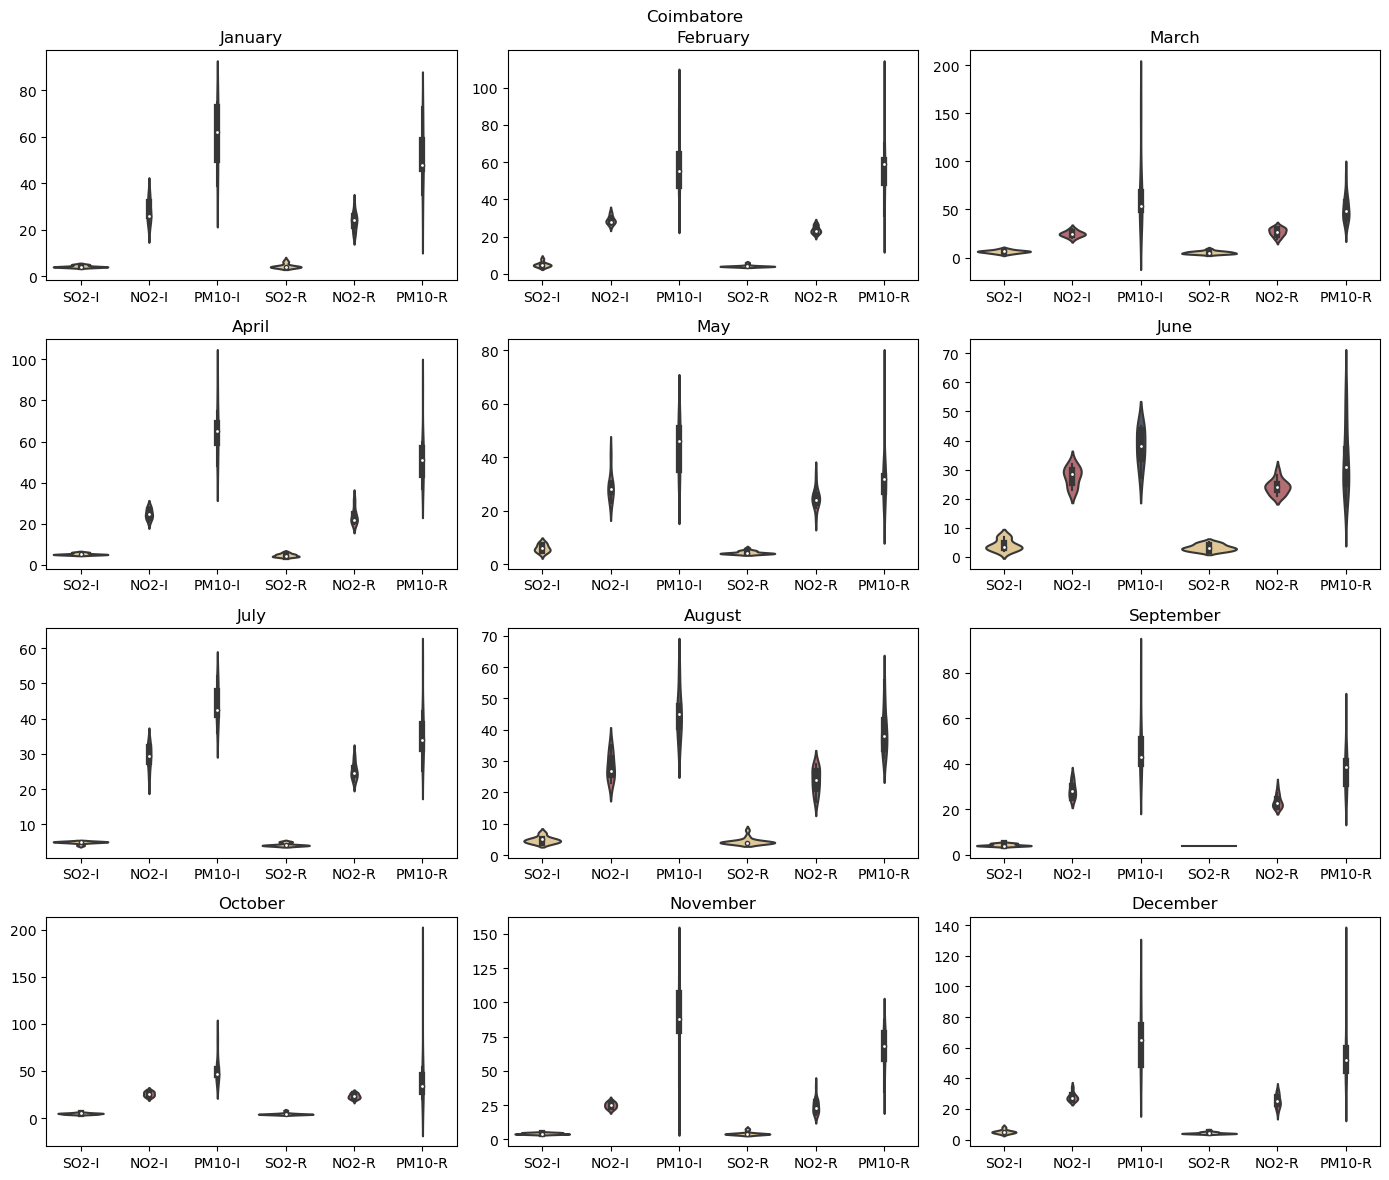

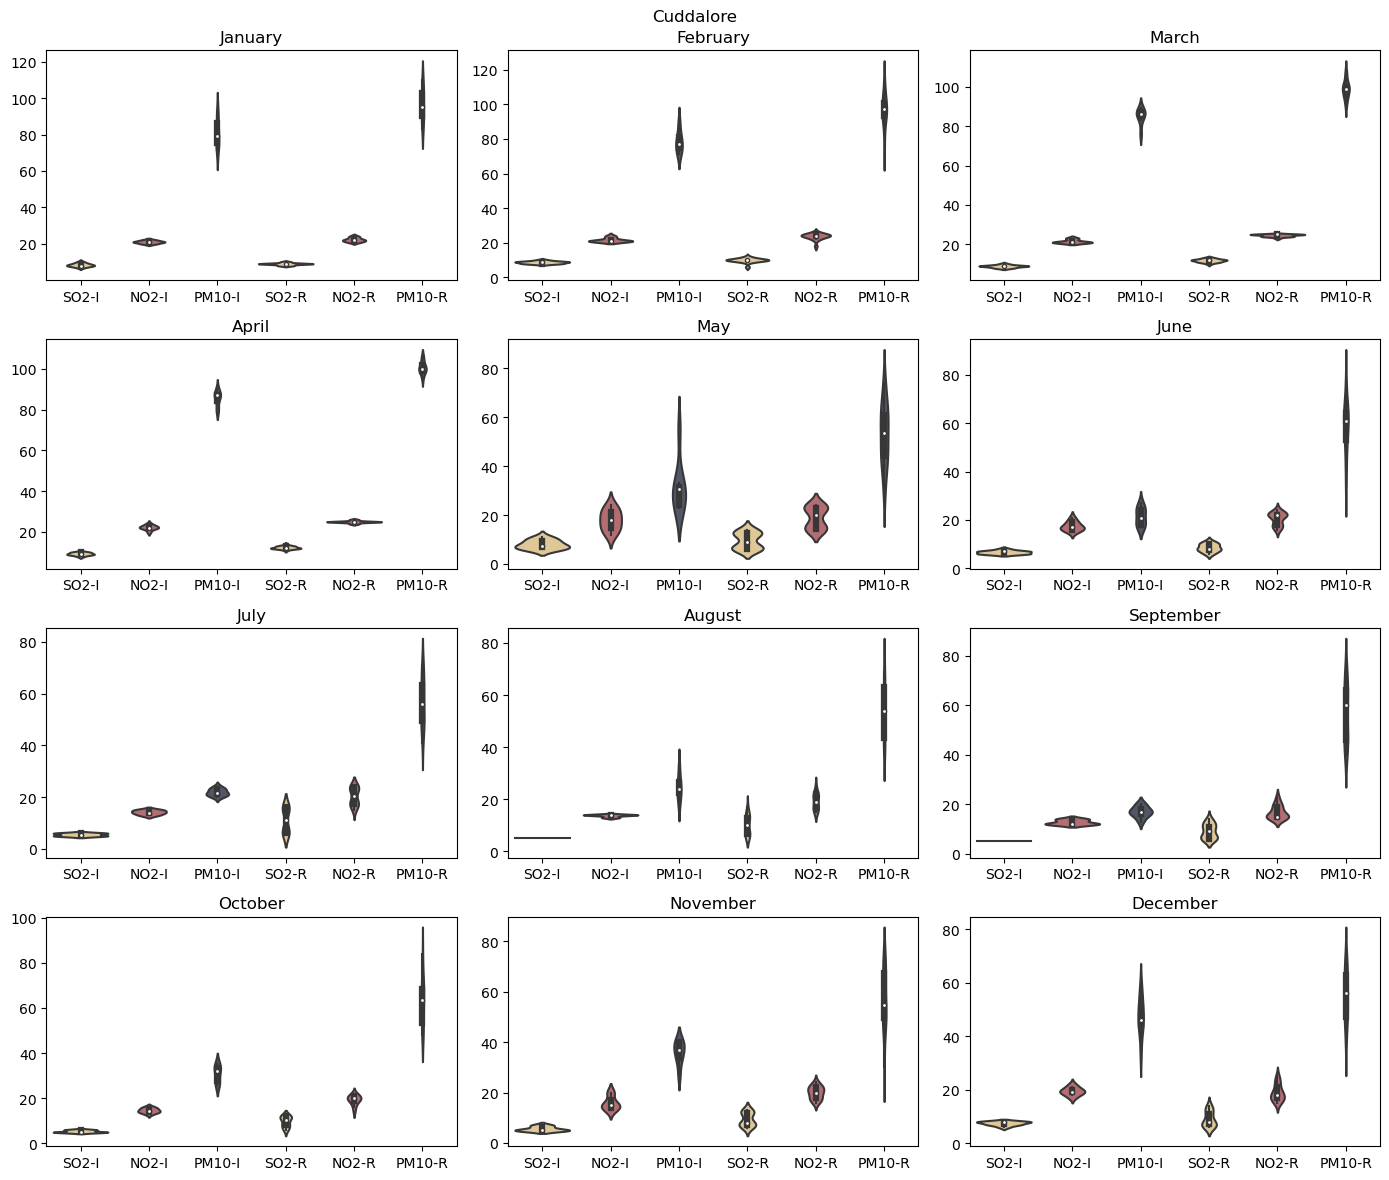

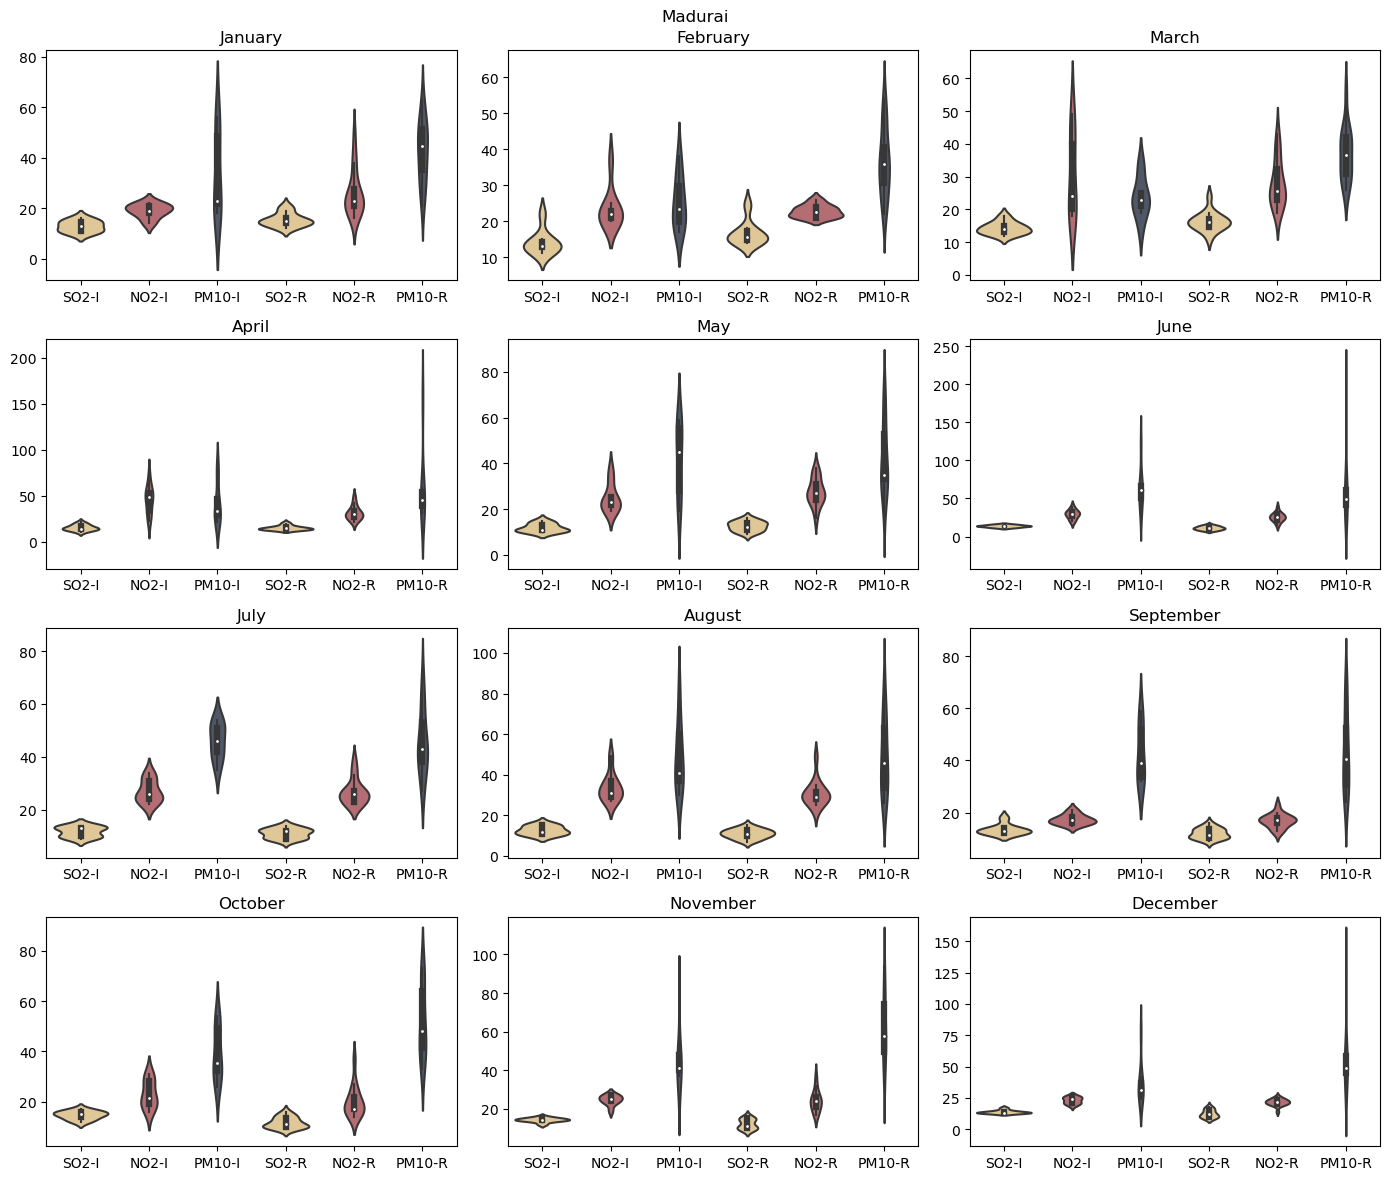

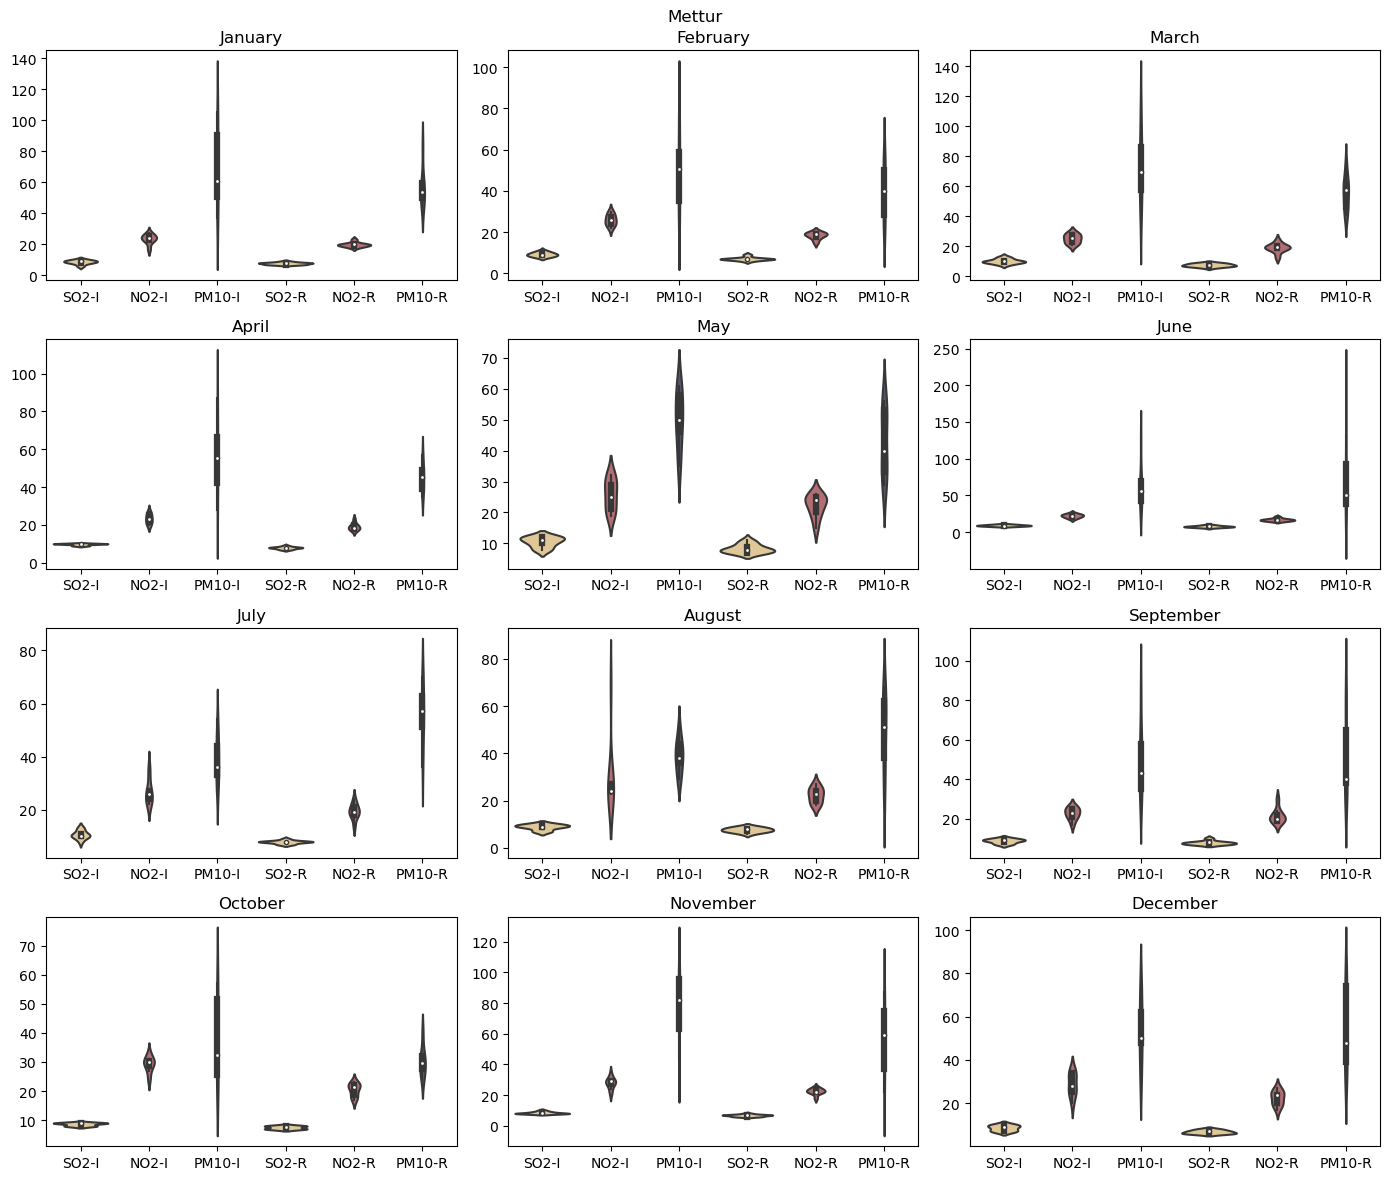

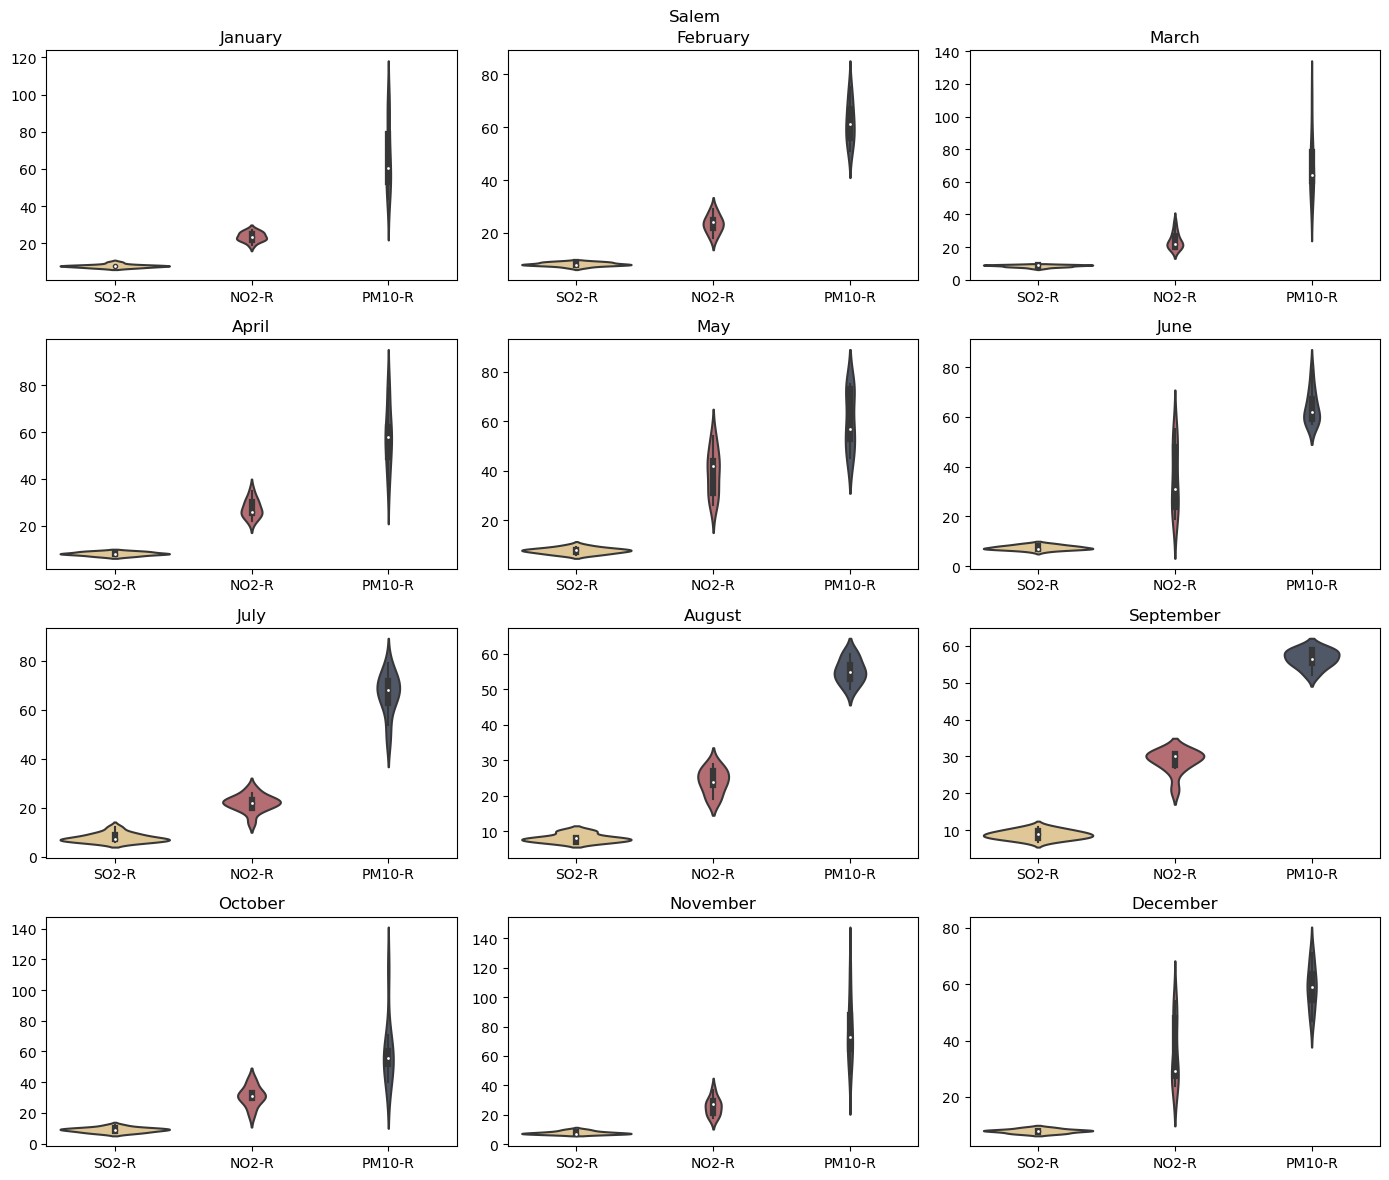

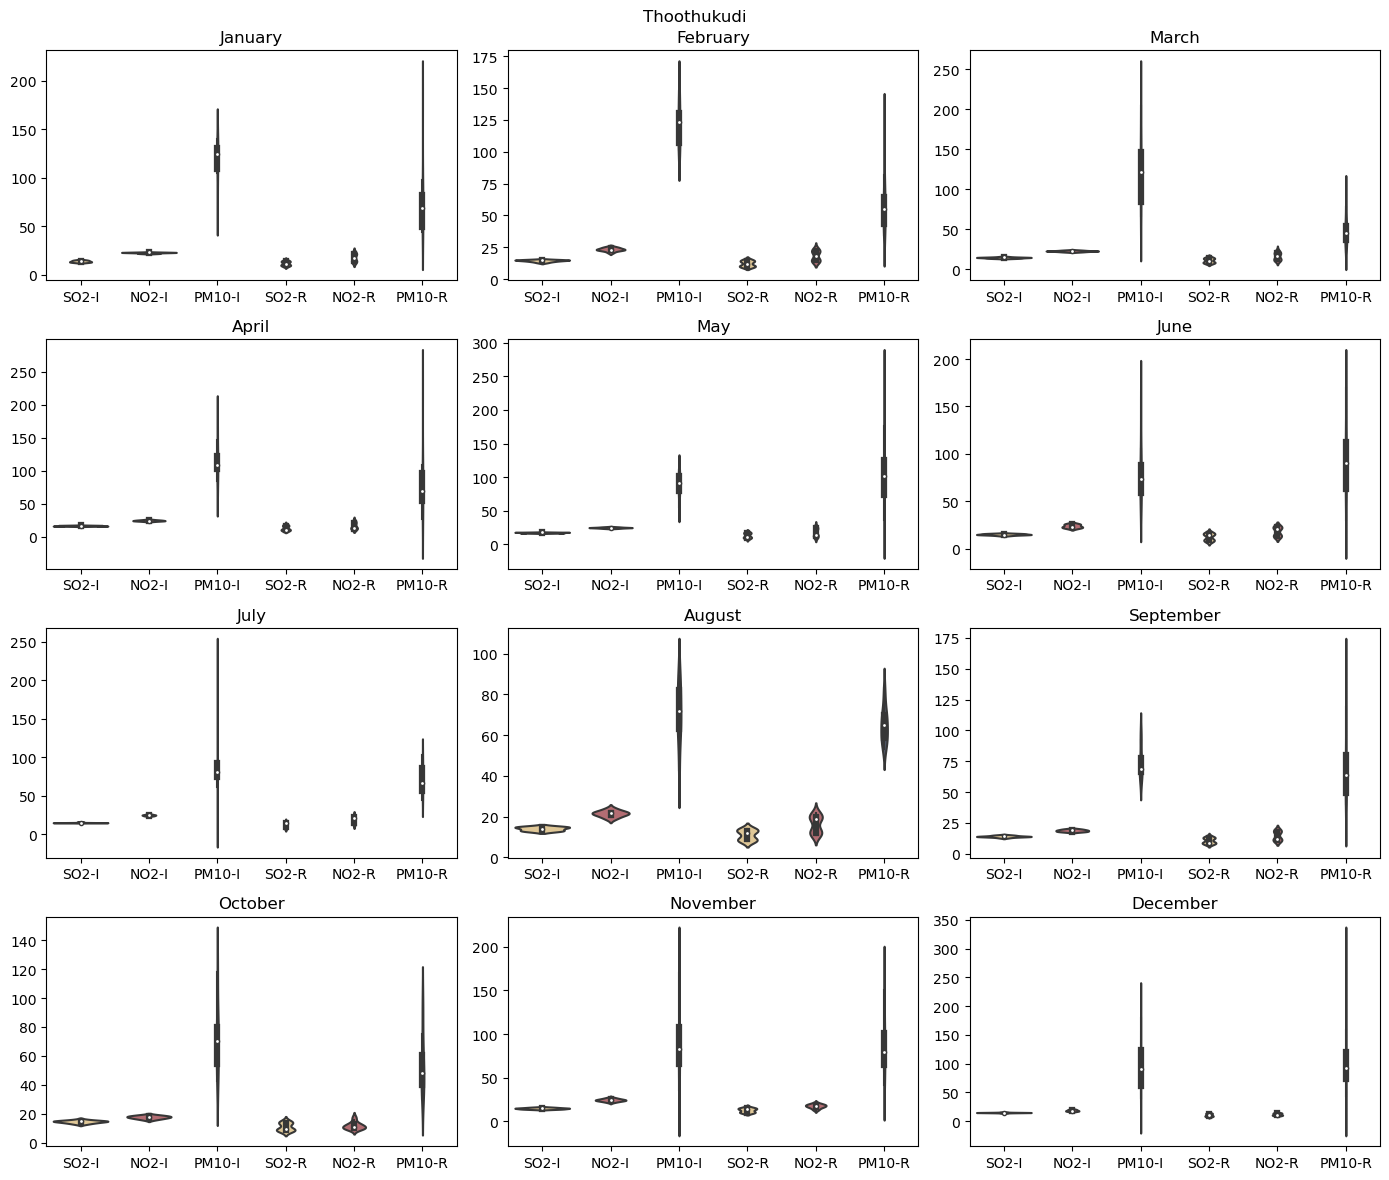

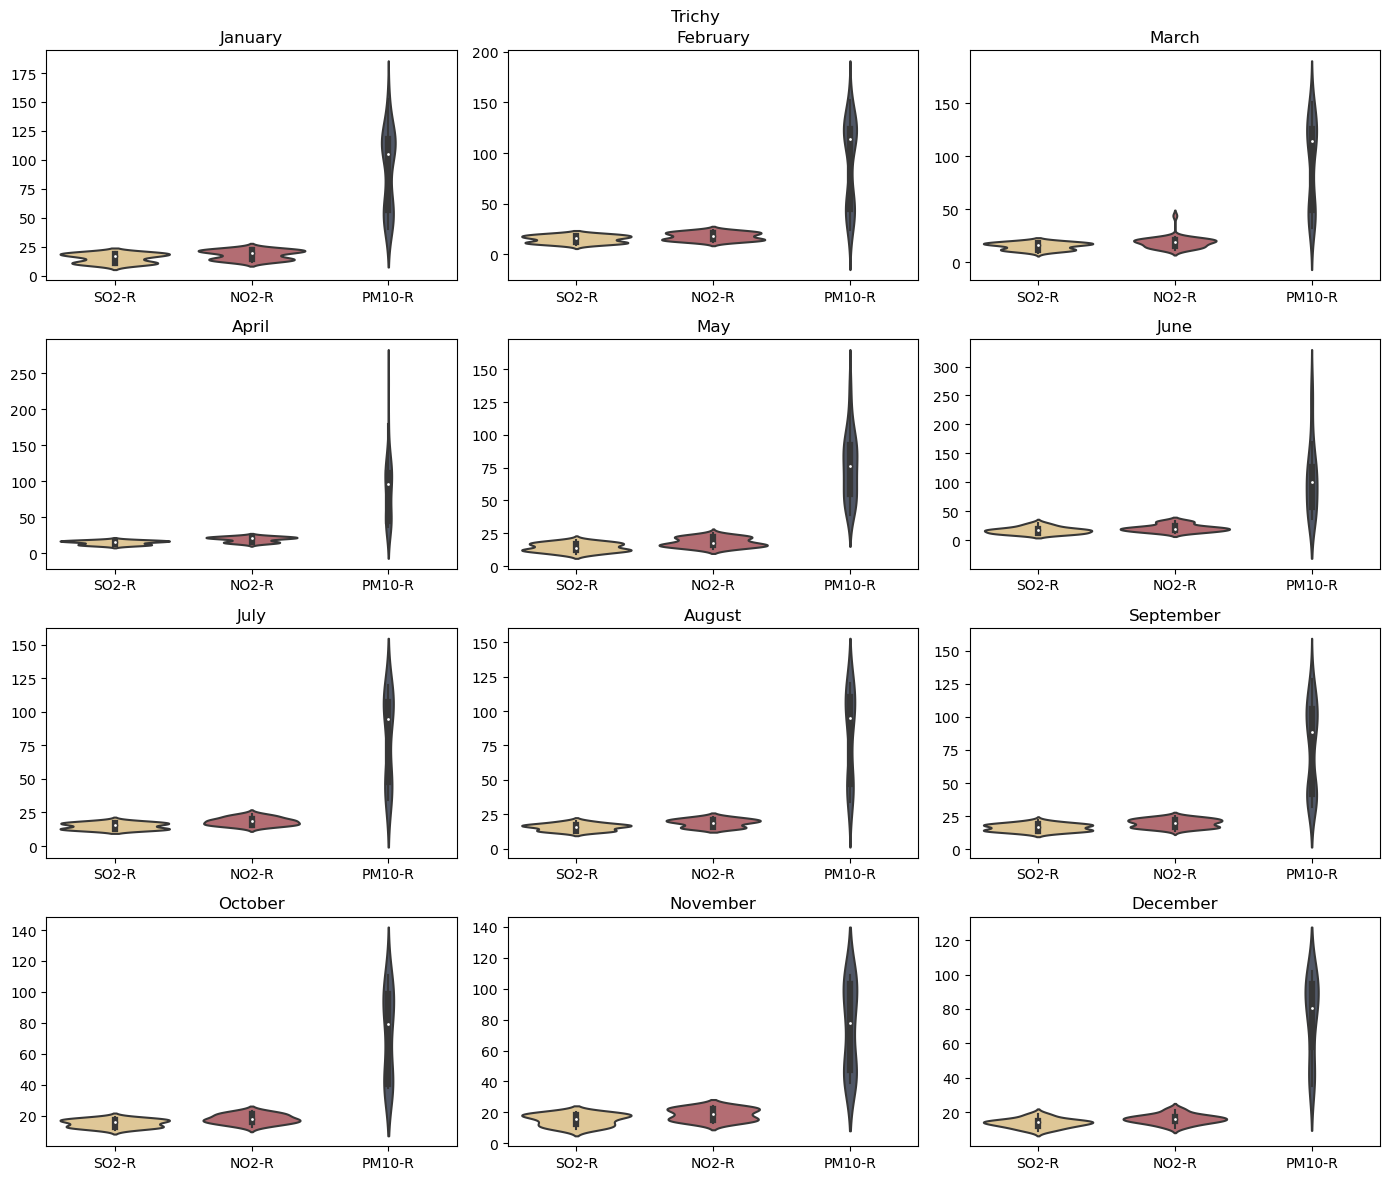

In [12]:
def make_temp_loctyp(data):
    tempdf = pd.DataFrame()
    for n, x in data.groupby("loctype"):
        tempdfn = pd.DataFrame()
        tempdfn["SO2-"+n[0]] = x["SO2"]
        tempdfn["NO2-"+n[0]] = x["NO2"]
        tempdfn["PM10-"+n[0]] = x["RSPM/PM10"]
        tempdf = pd.concat([tempdf, tempdfn], ignore_index=True)
    
    return tempdf
    
def draw_(area):
    fig,axes = plt.subplots(nrows=4,ncols=3,figsize=(14,12))
    for i,(group, data_) in enumerate(data_by_area[area].groupby(data_by_area[area]["date"].dt.to_period('M'))):
        tempdf = make_temp_loctyp(data_)
        ax = axes[i//3][i%3]
        sns.violinplot(tempdf,ax=ax,palette=[so2_color,no2_color,pm10_color,so2_color,no2_color,pm10_color])
        ax.set_title(group.strftime("%B"))
    plt.suptitle(area)
    plt.tight_layout()
    plt.show()

for area in unique_areas:
    draw_(area)

## Data Distribution of Every Area and location type by Weekdays (MON to SAT)
**NOTE:** NO DATA AVAILABLE FOR SUNDAYS, SO I REMOVED SUNDAY FROM THE LIST

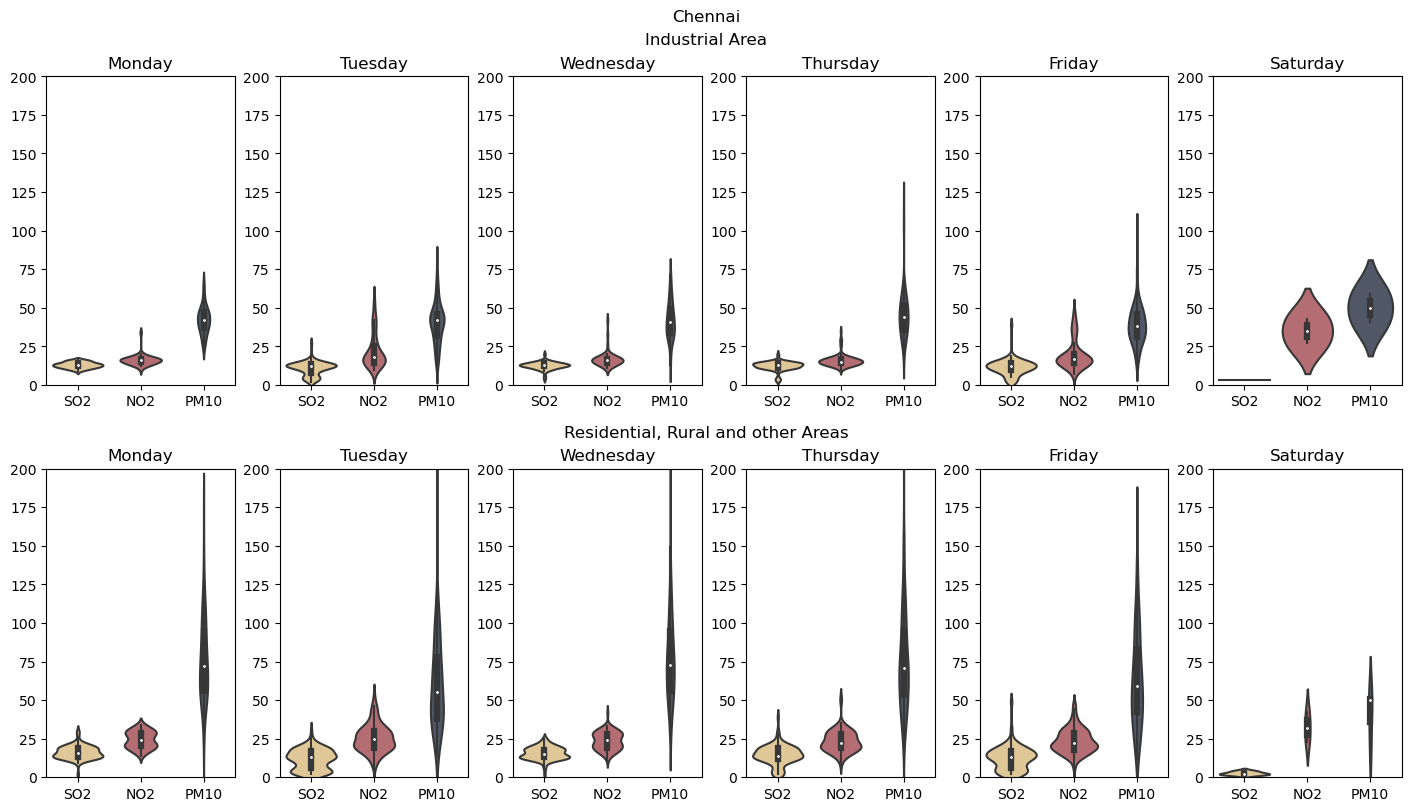

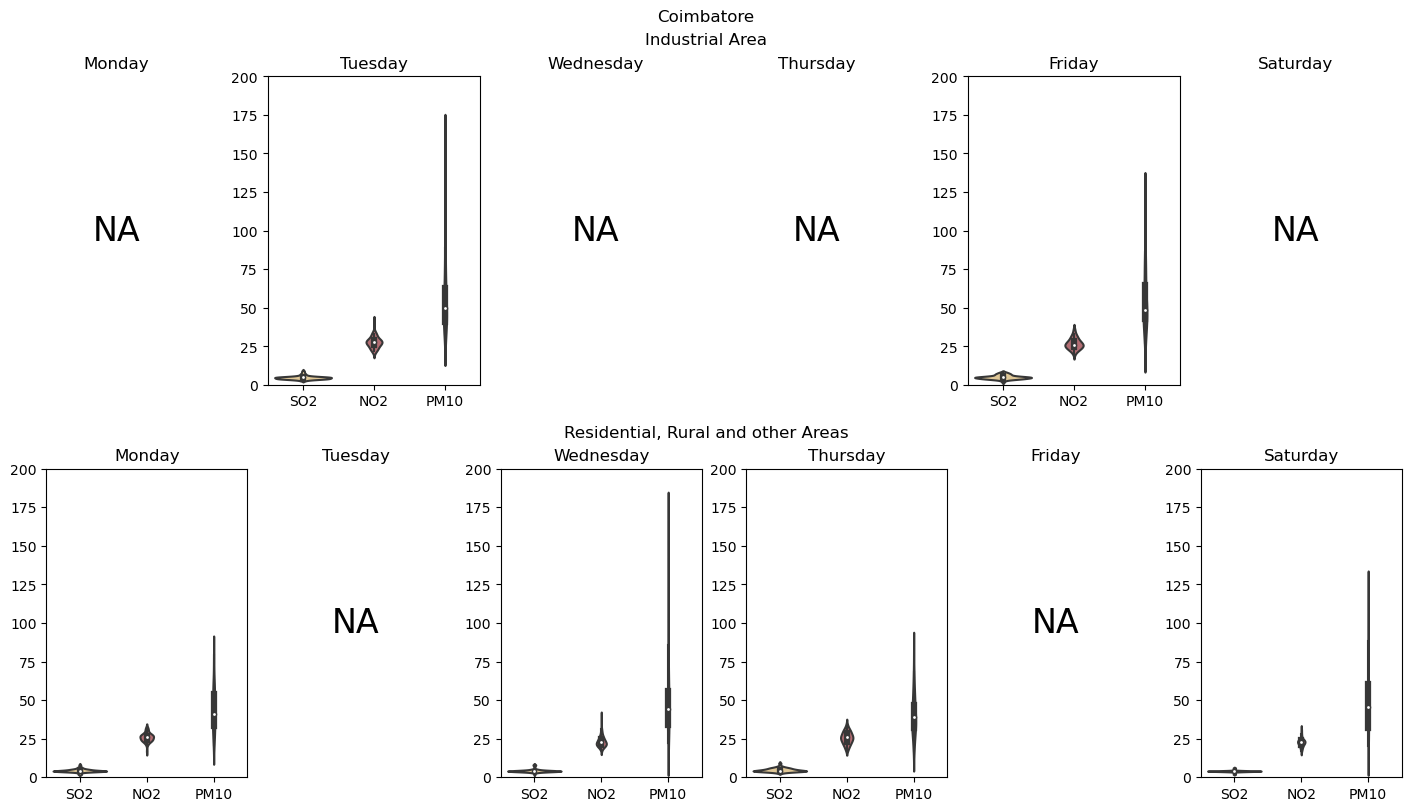

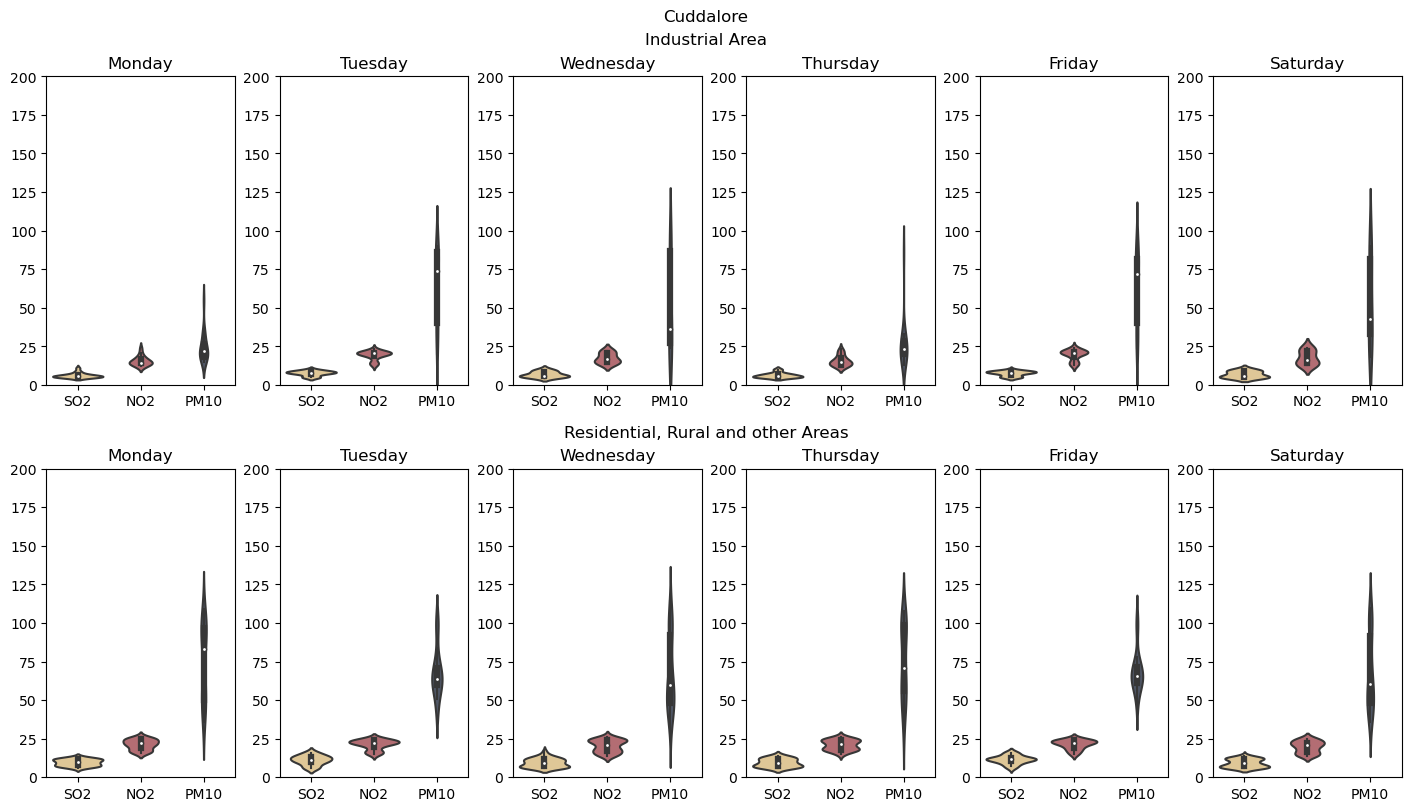

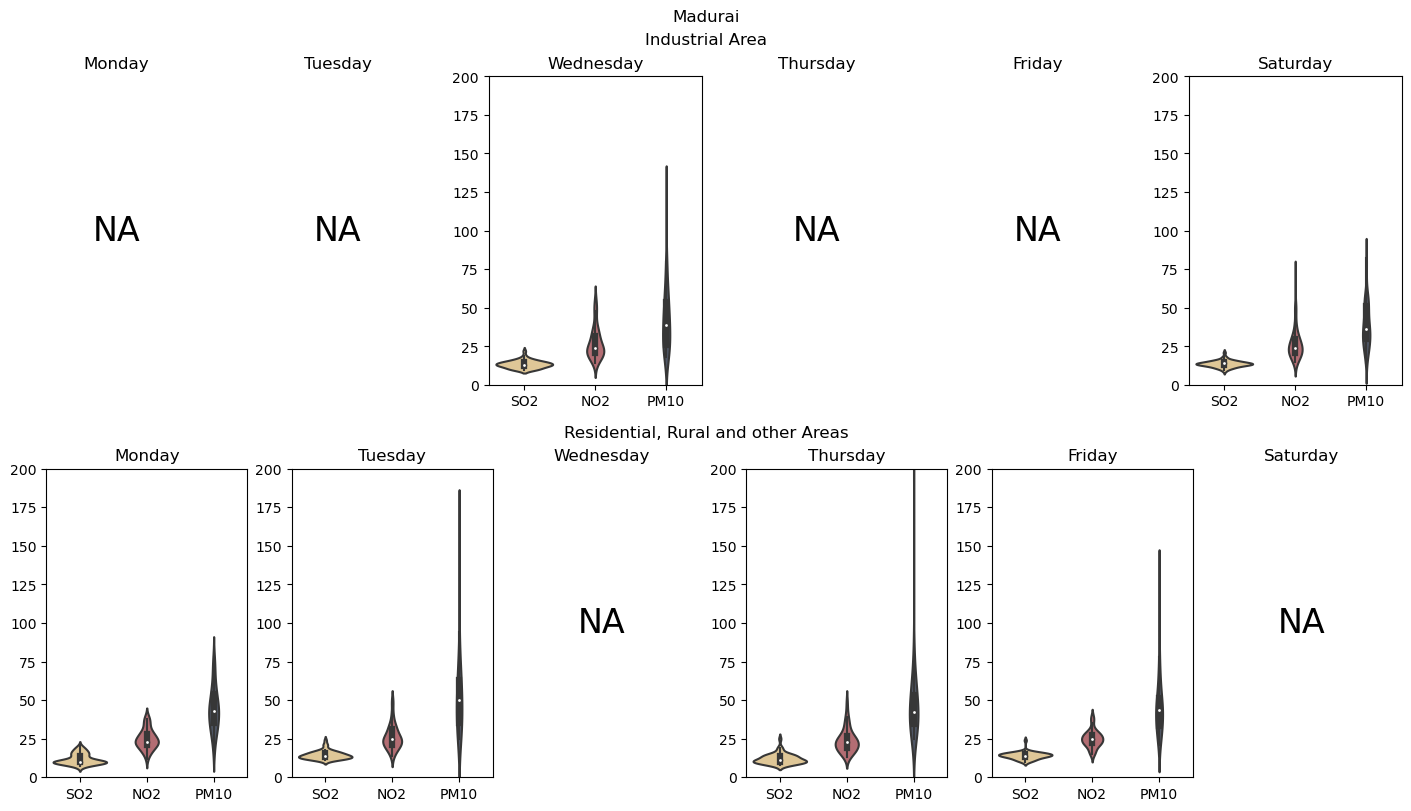

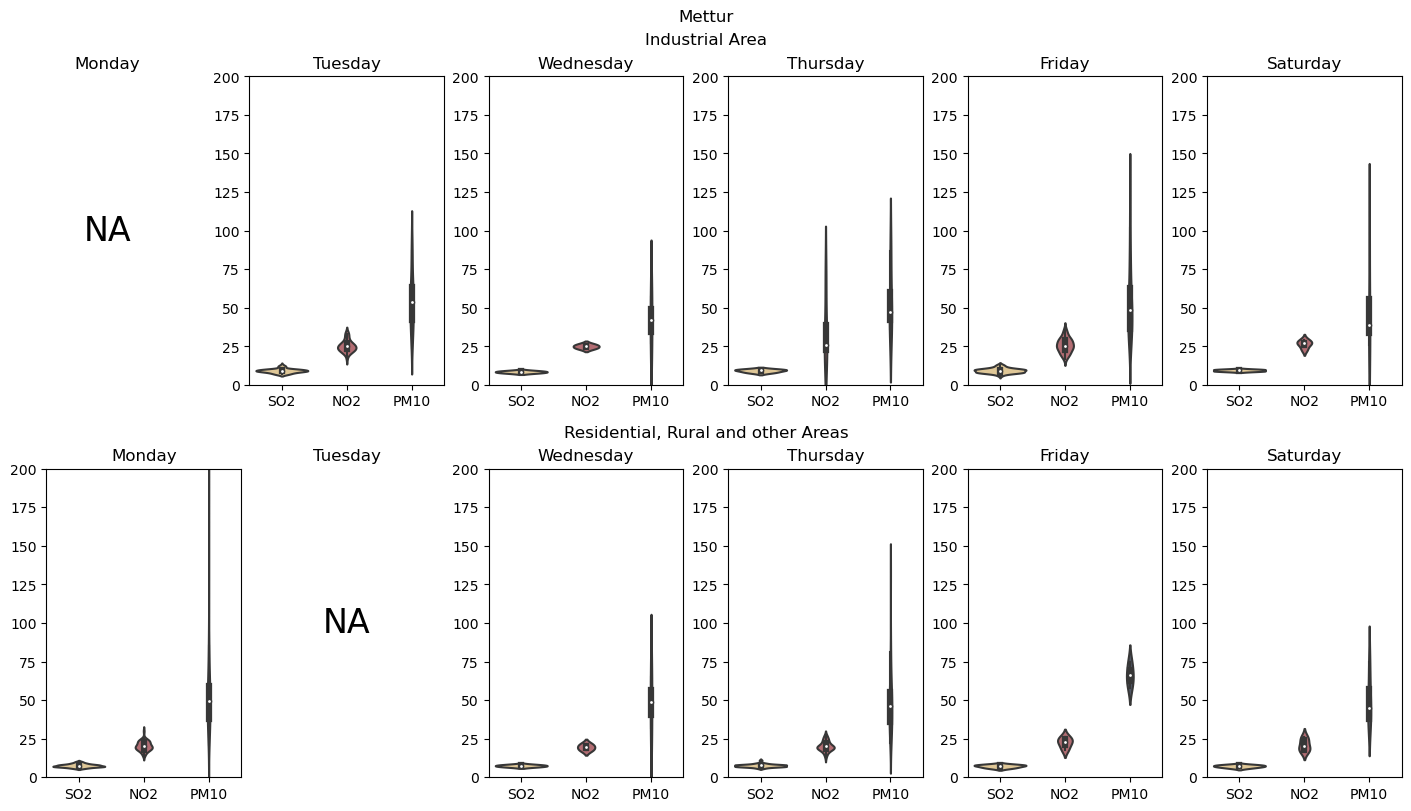

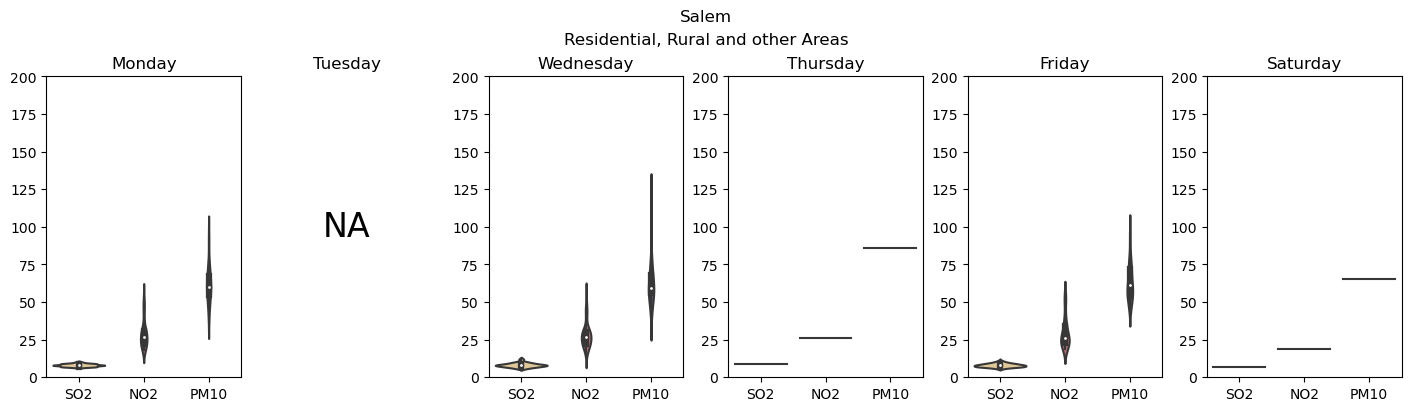

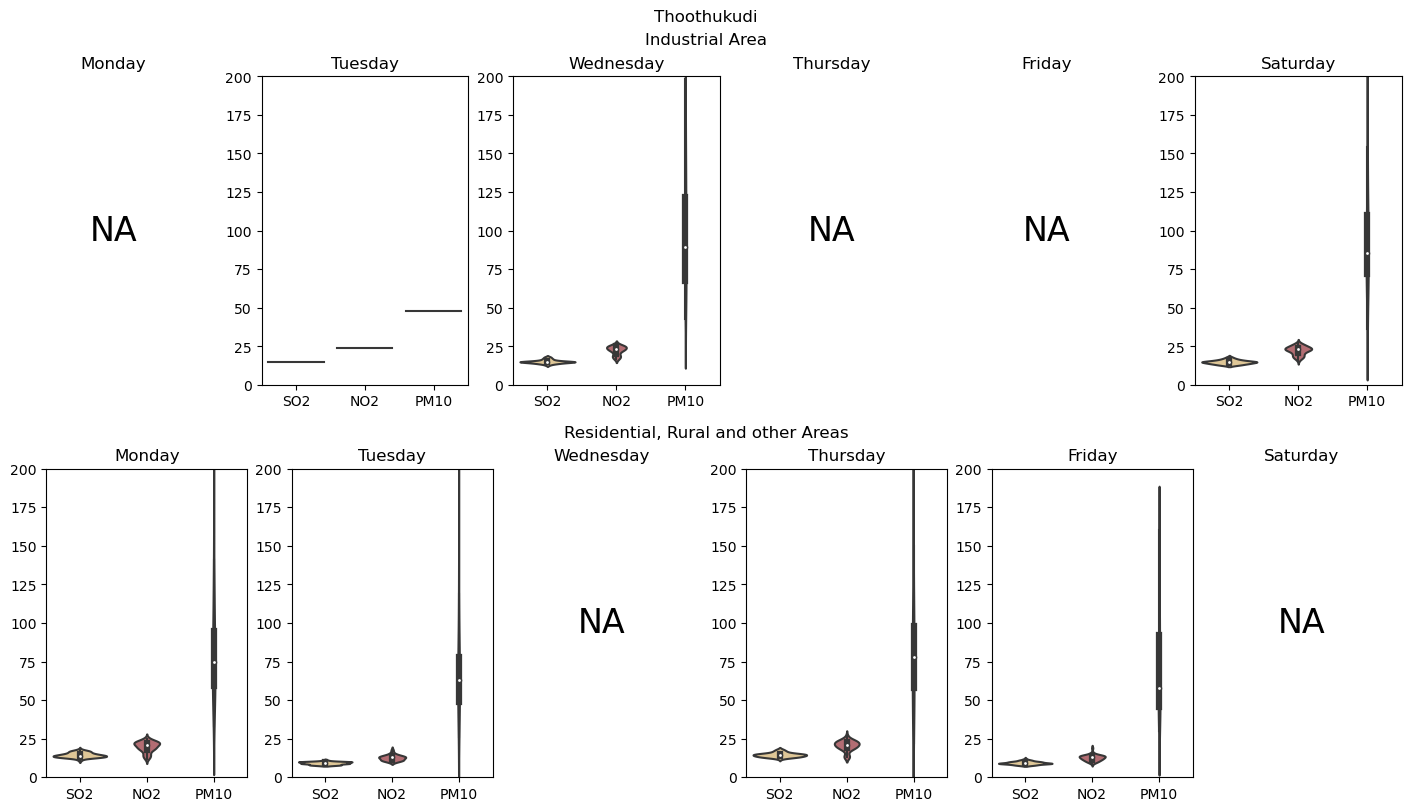

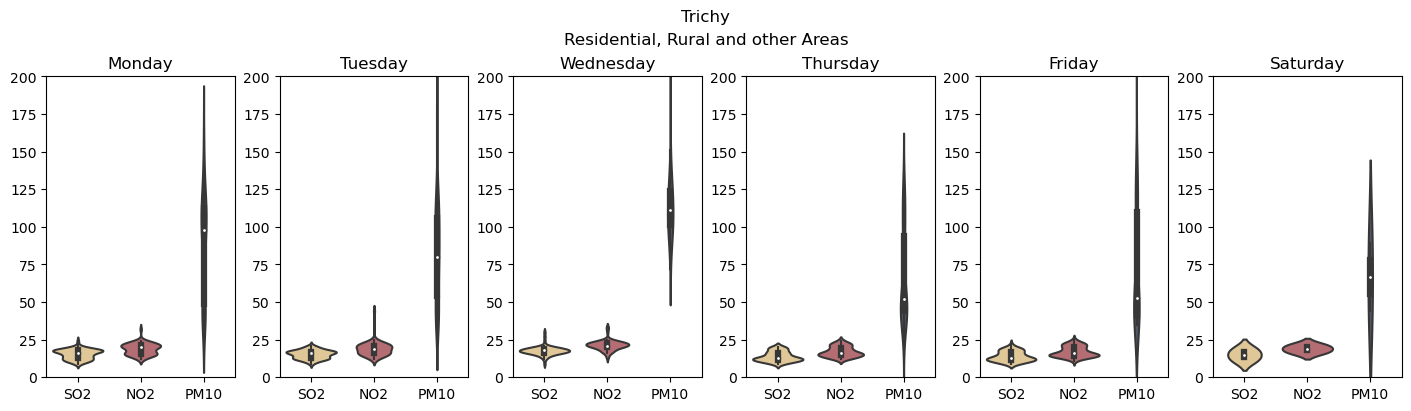

In [13]:
# NO DATA AVAILABLE FOR SUNDAYS, SO I REMOVED SUNDAY FROM THE LIST
def draw_(area):
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    gb_loc = data_by_area[area].groupby("loctype")
    N_ = len(gb_loc)
    
    fig = plt.figure(constrained_layout=True,figsize=(14,4*N_))
    fig.suptitle(area)

    i = 0

    subfigs = fig.subfigures(nrows=N_, ncols=1,)
    
    for name, data_ in gb_loc:
        if N_ >1:
            subfig = subfigs[i]
        else: subfig = subfigs
        axs = subfig.subplots(nrows=1,ncols=len(day_names))
        
        subfig.suptitle(name,fontsize=12)
        
        by_week_days = defaultdict(list)
        
        for _,row in  data_.iterrows():
            
            by_week_days[row["date"].strftime("%A")].append(
                (row["SO2"], row["NO2"],row["RSPM/PM10"])
            )
            
        for idx, day in enumerate(day_names):
            values = np.array(by_week_days[day])
            if len(values)>0:
                temp = pd.DataFrame(values)
                temp.columns = ["SO2","NO2","PM10"]
                
                sns.violinplot(data=temp, ax=axs[idx],palette=[so2_color,no2_color,pm10_color])
                    
                axs[idx].set_ylim(0,200)
            else:
                axs[idx].axis('off')
                axs[idx].text(0.5, 0.5, "NA", fontsize=24, ha='center', va='center')
            axs[idx].set_title(day)
        
        i+=1
        
    plt.show()
        

for area in data_by_area.keys():
    draw_(area)          

## SO2, NO2, & PM10 in Every Area and Location Type, Regression Line, With Important Holidays Marked

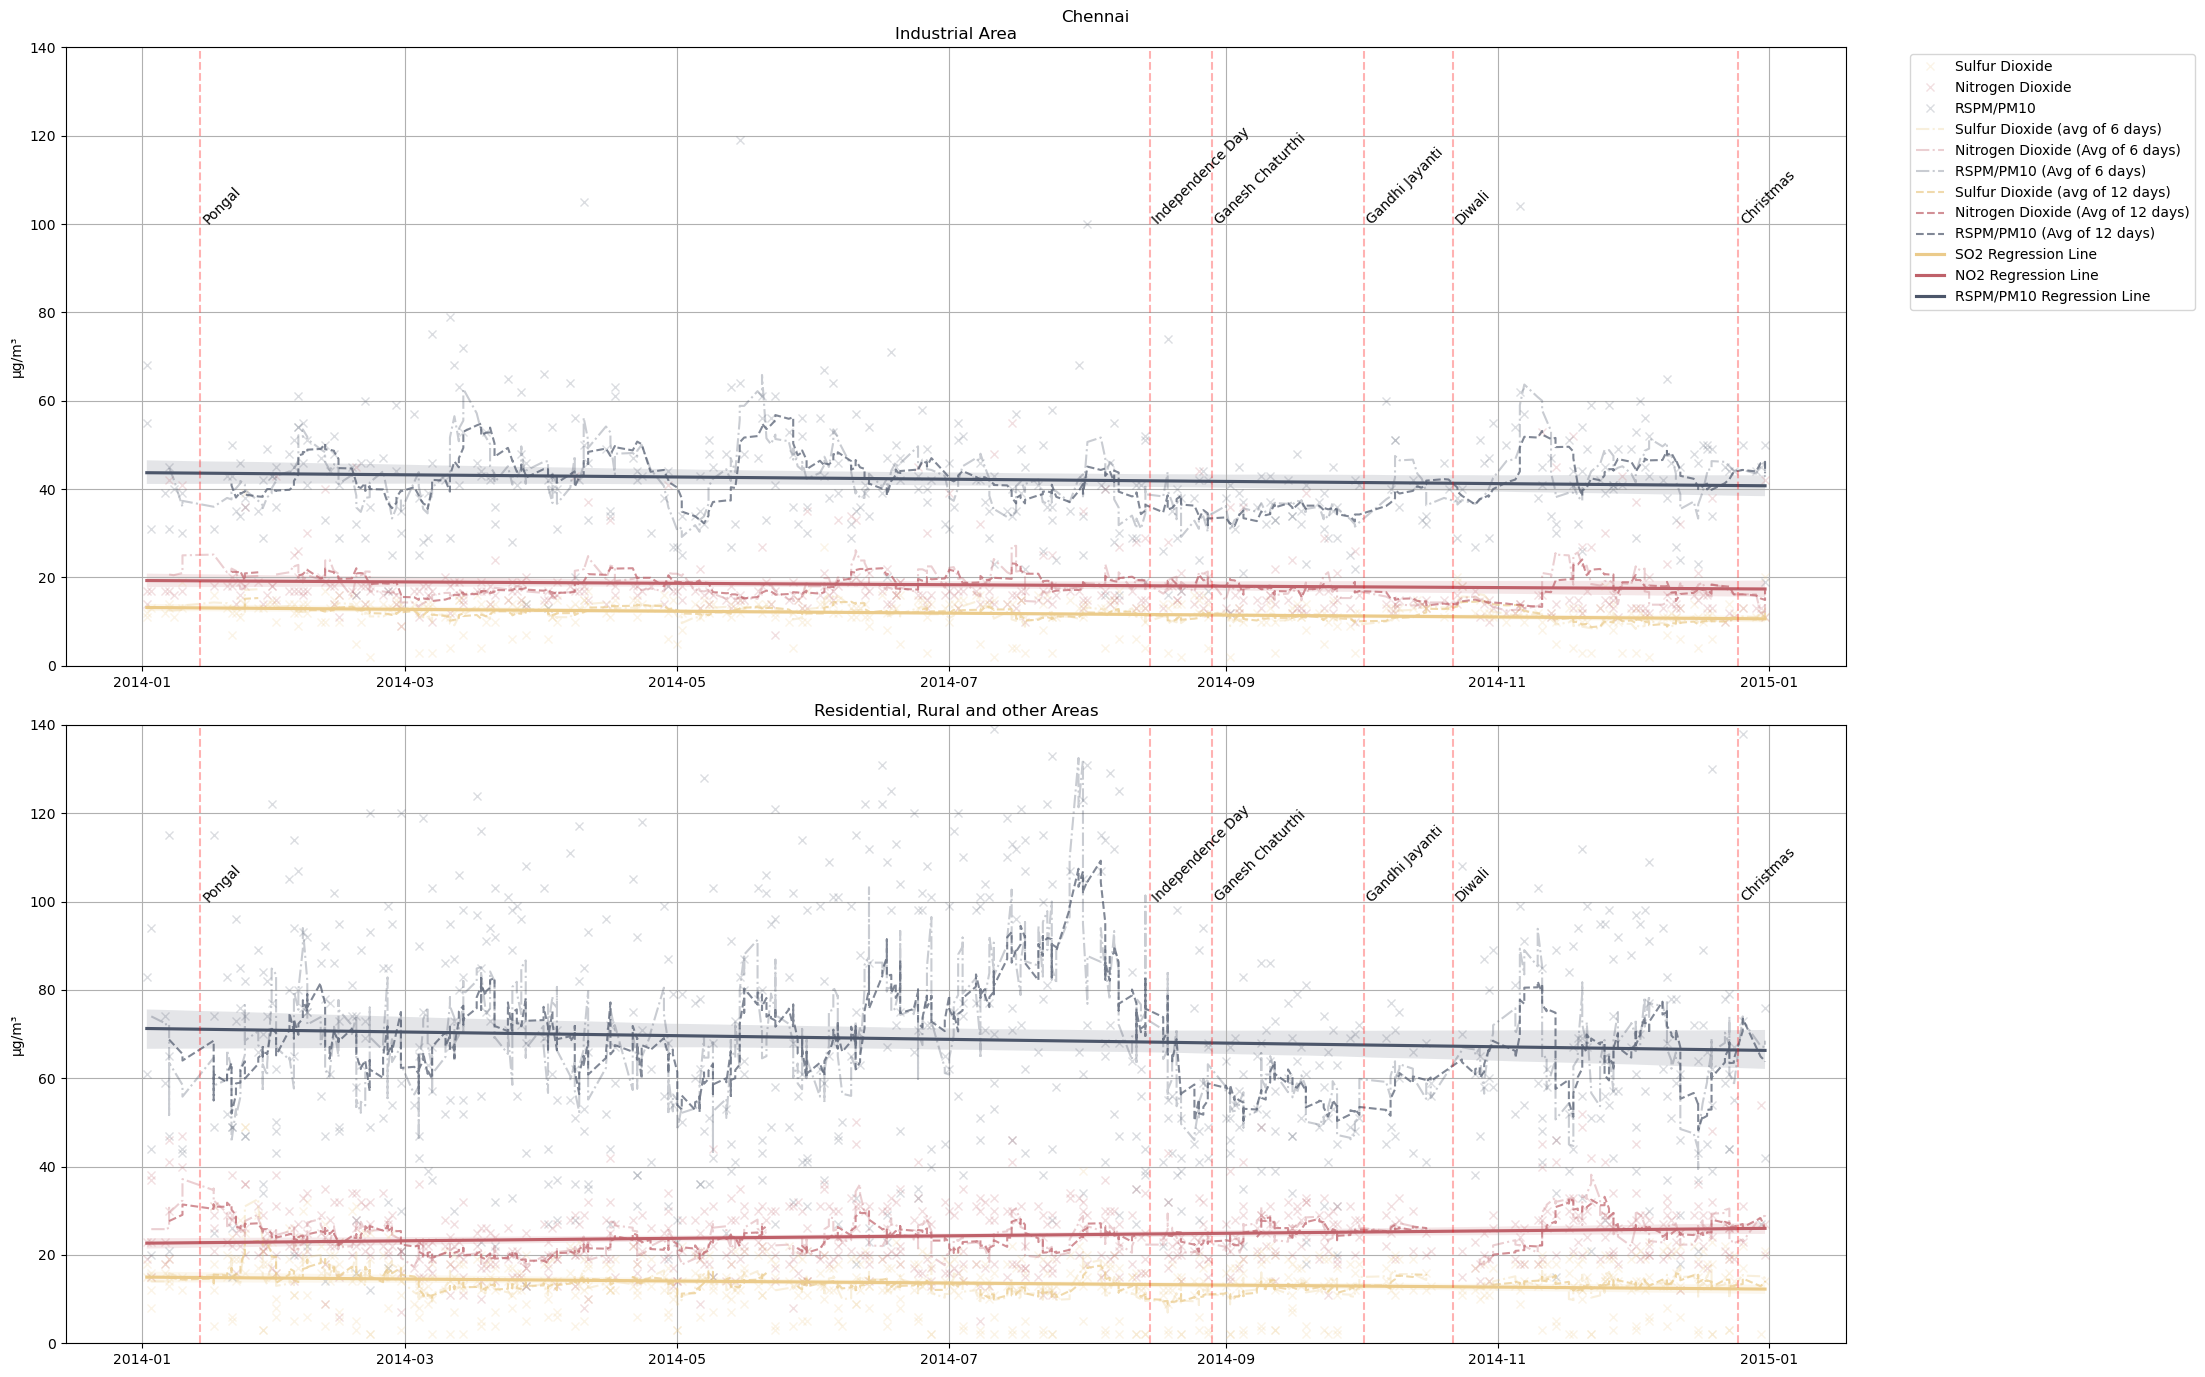

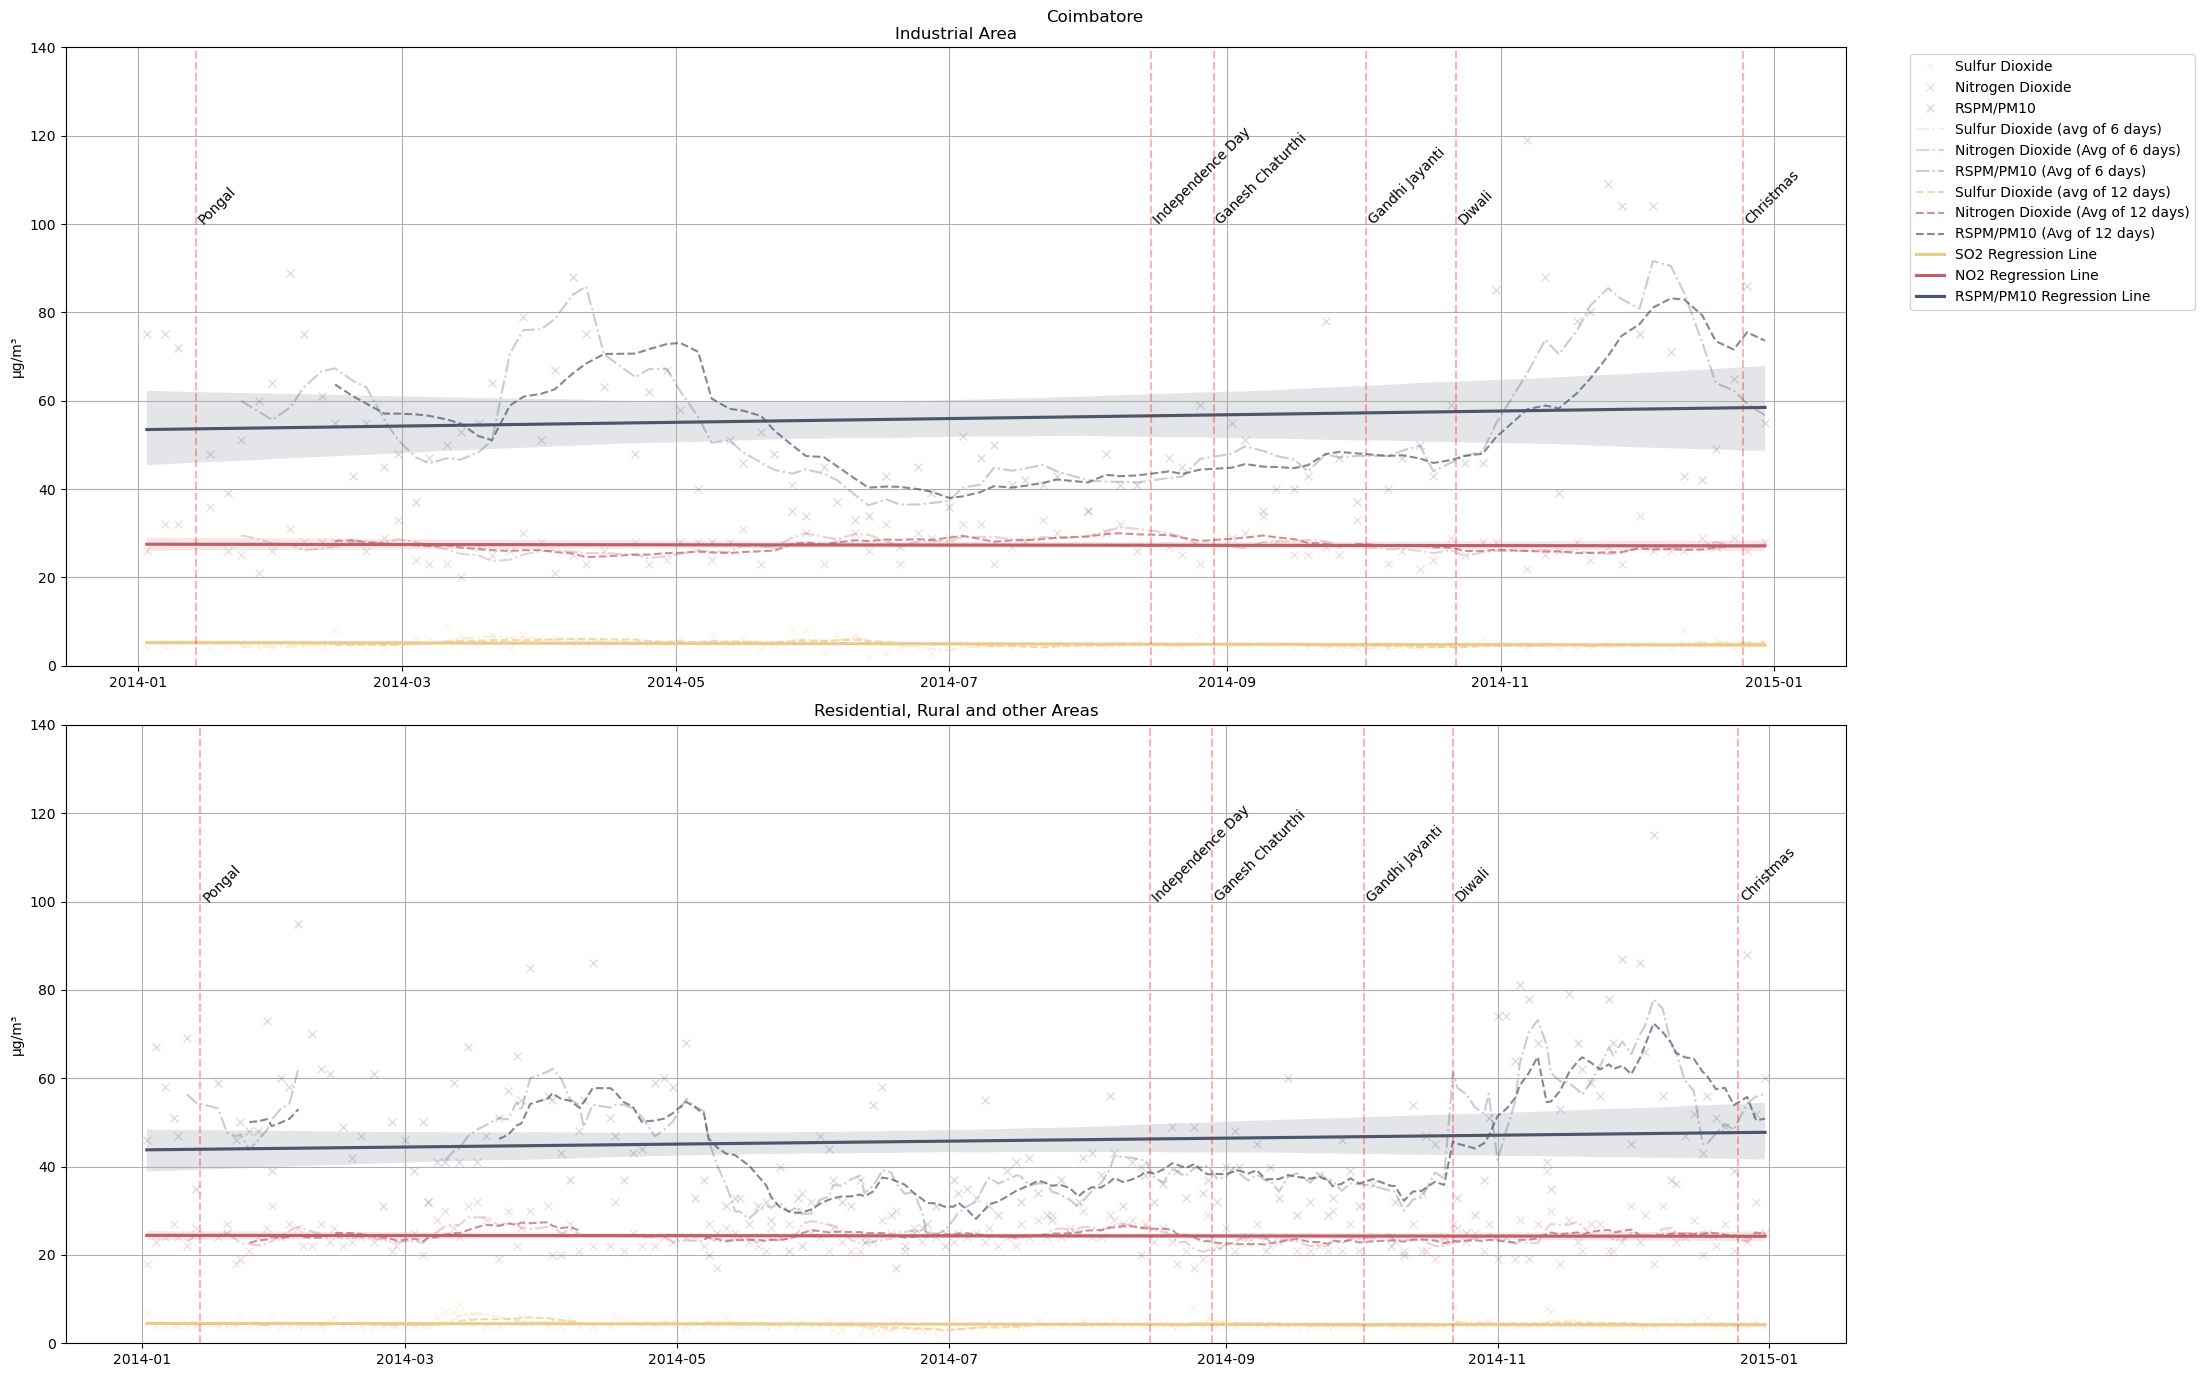

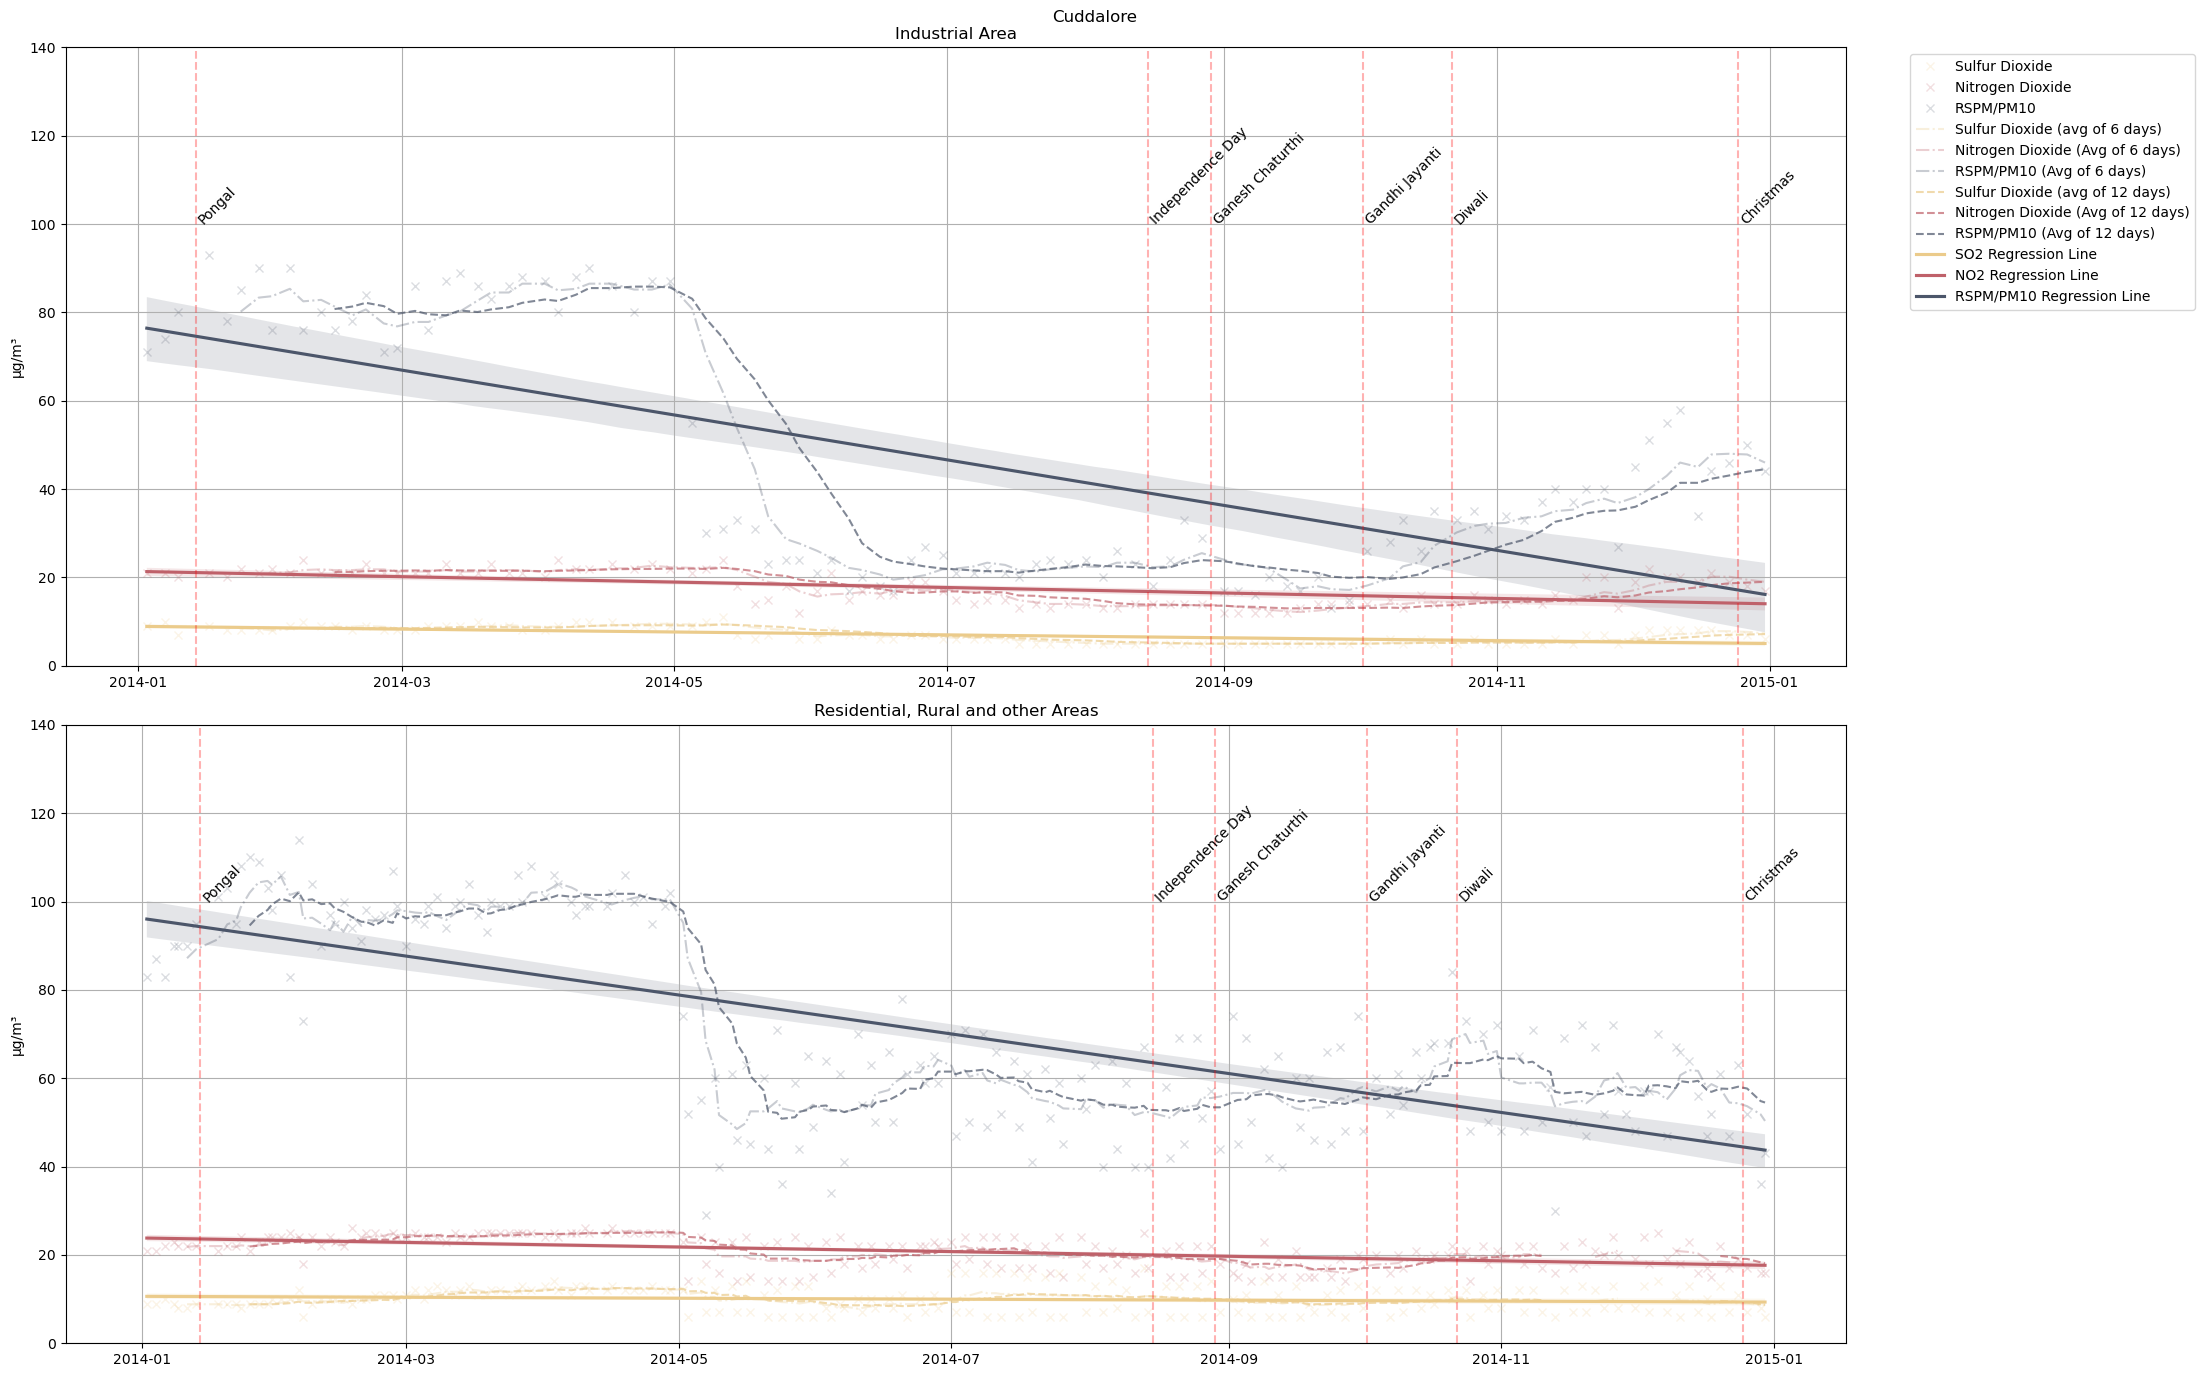

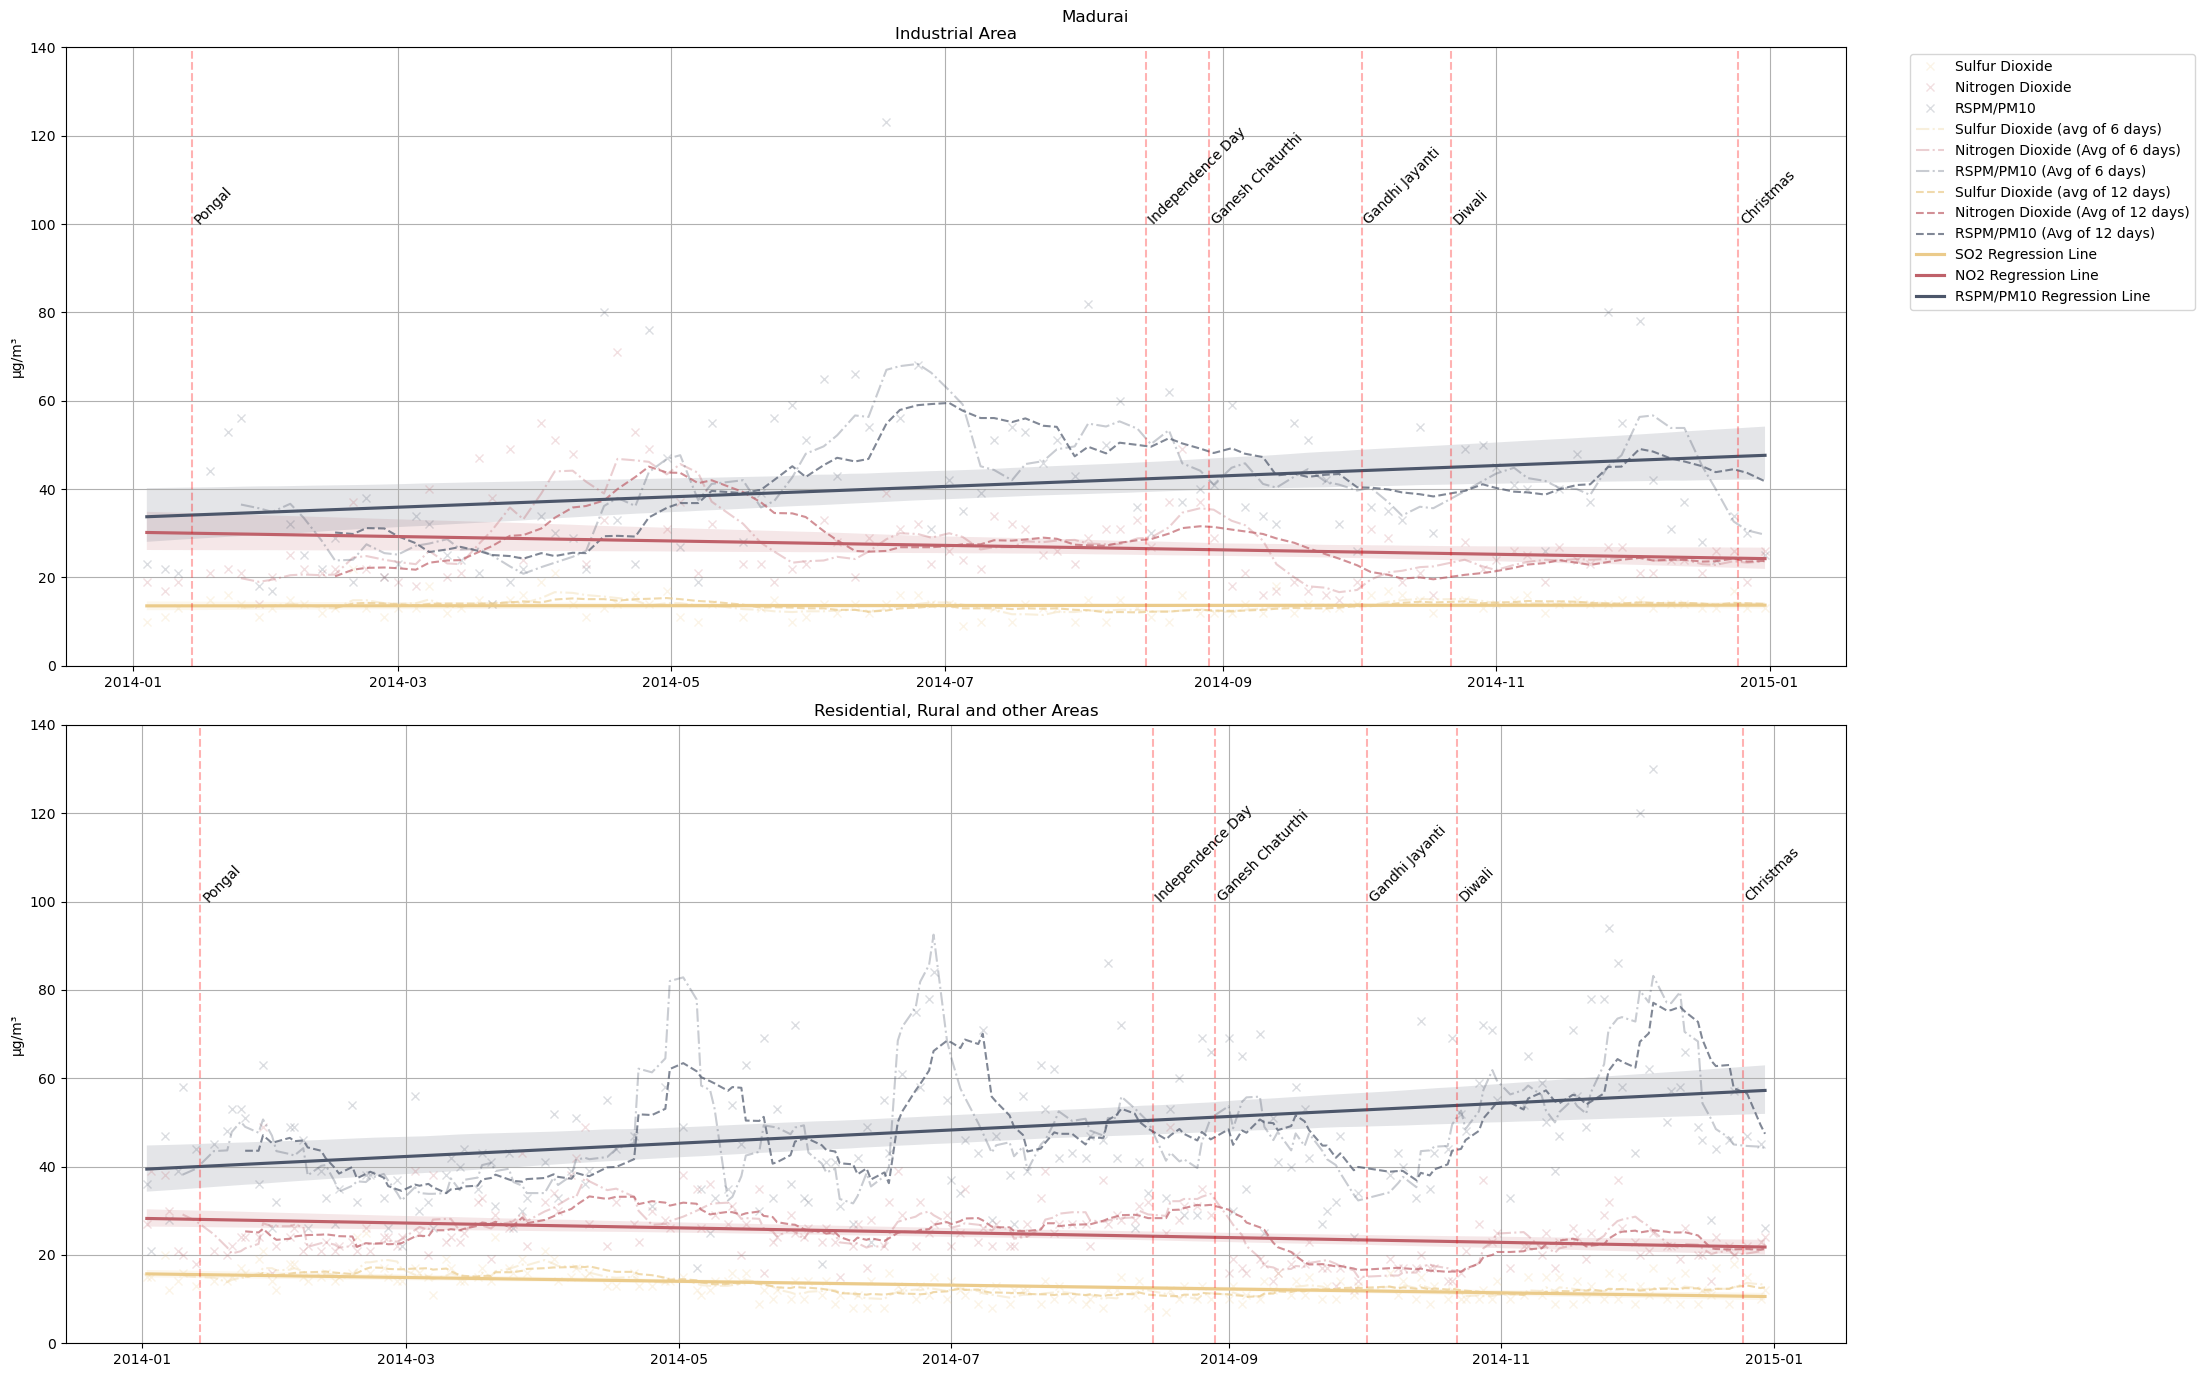

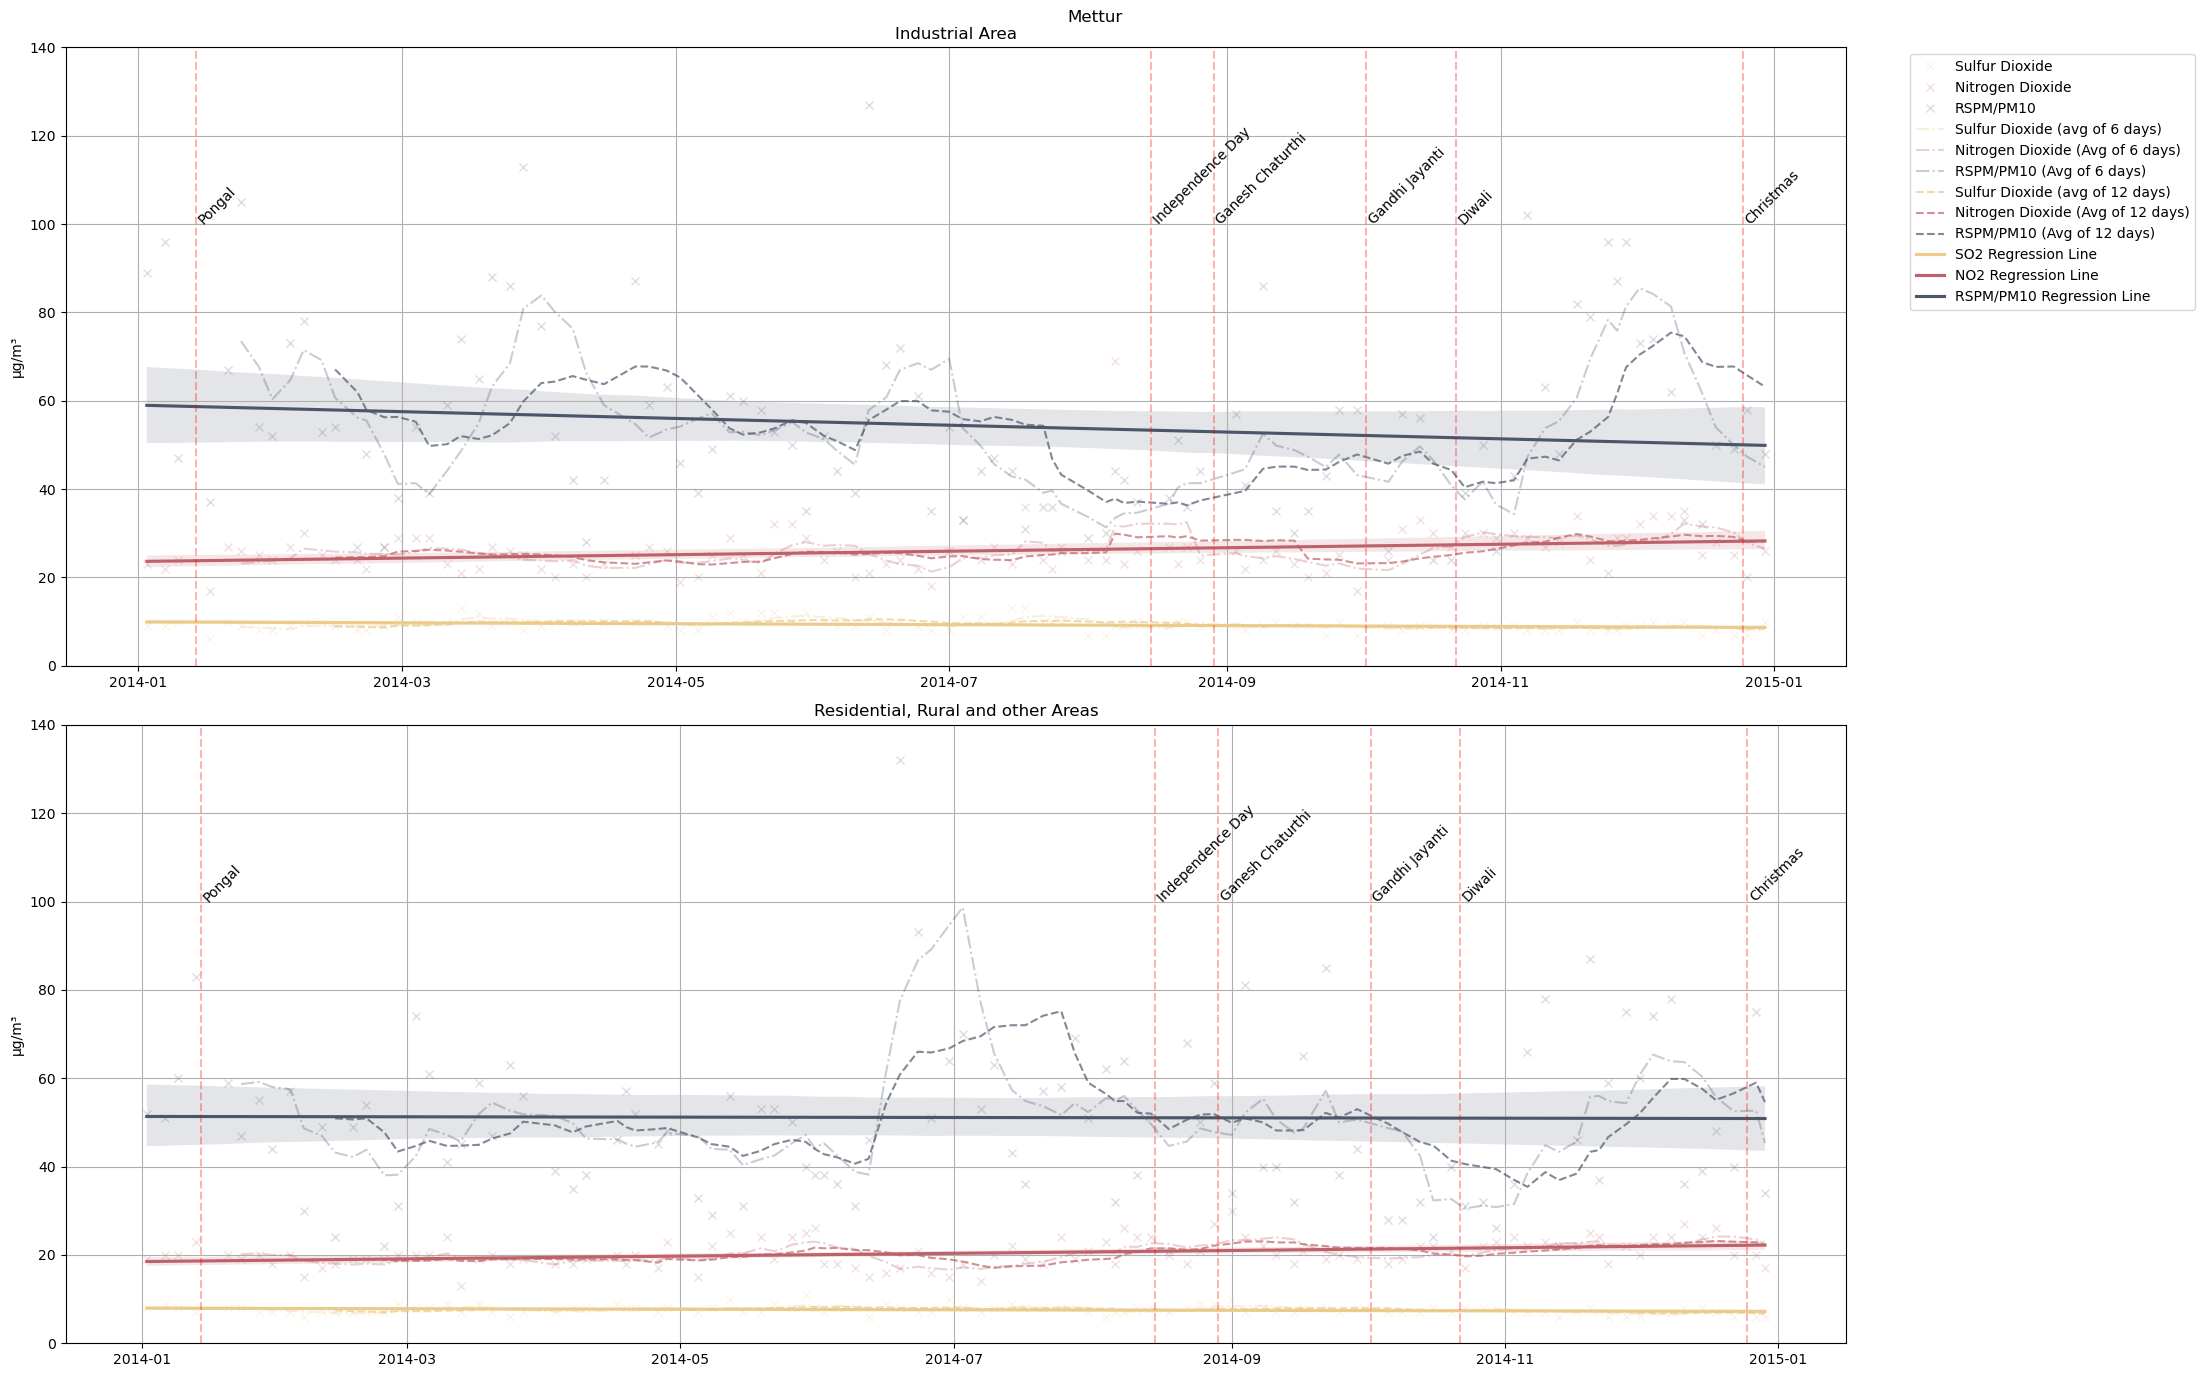

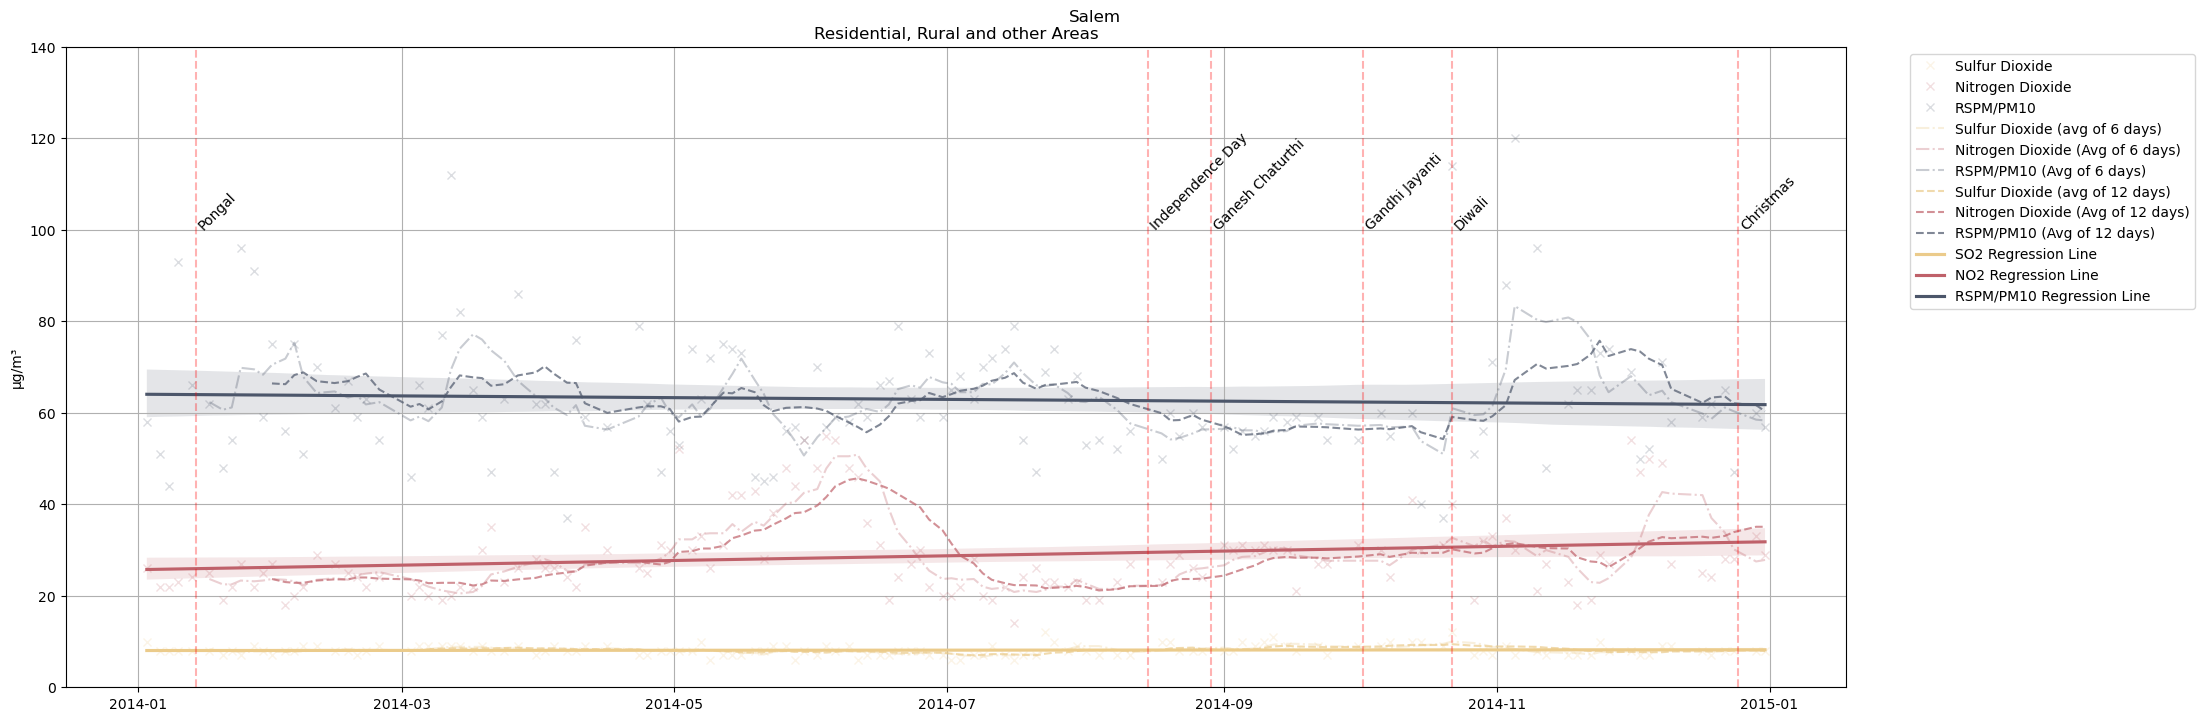

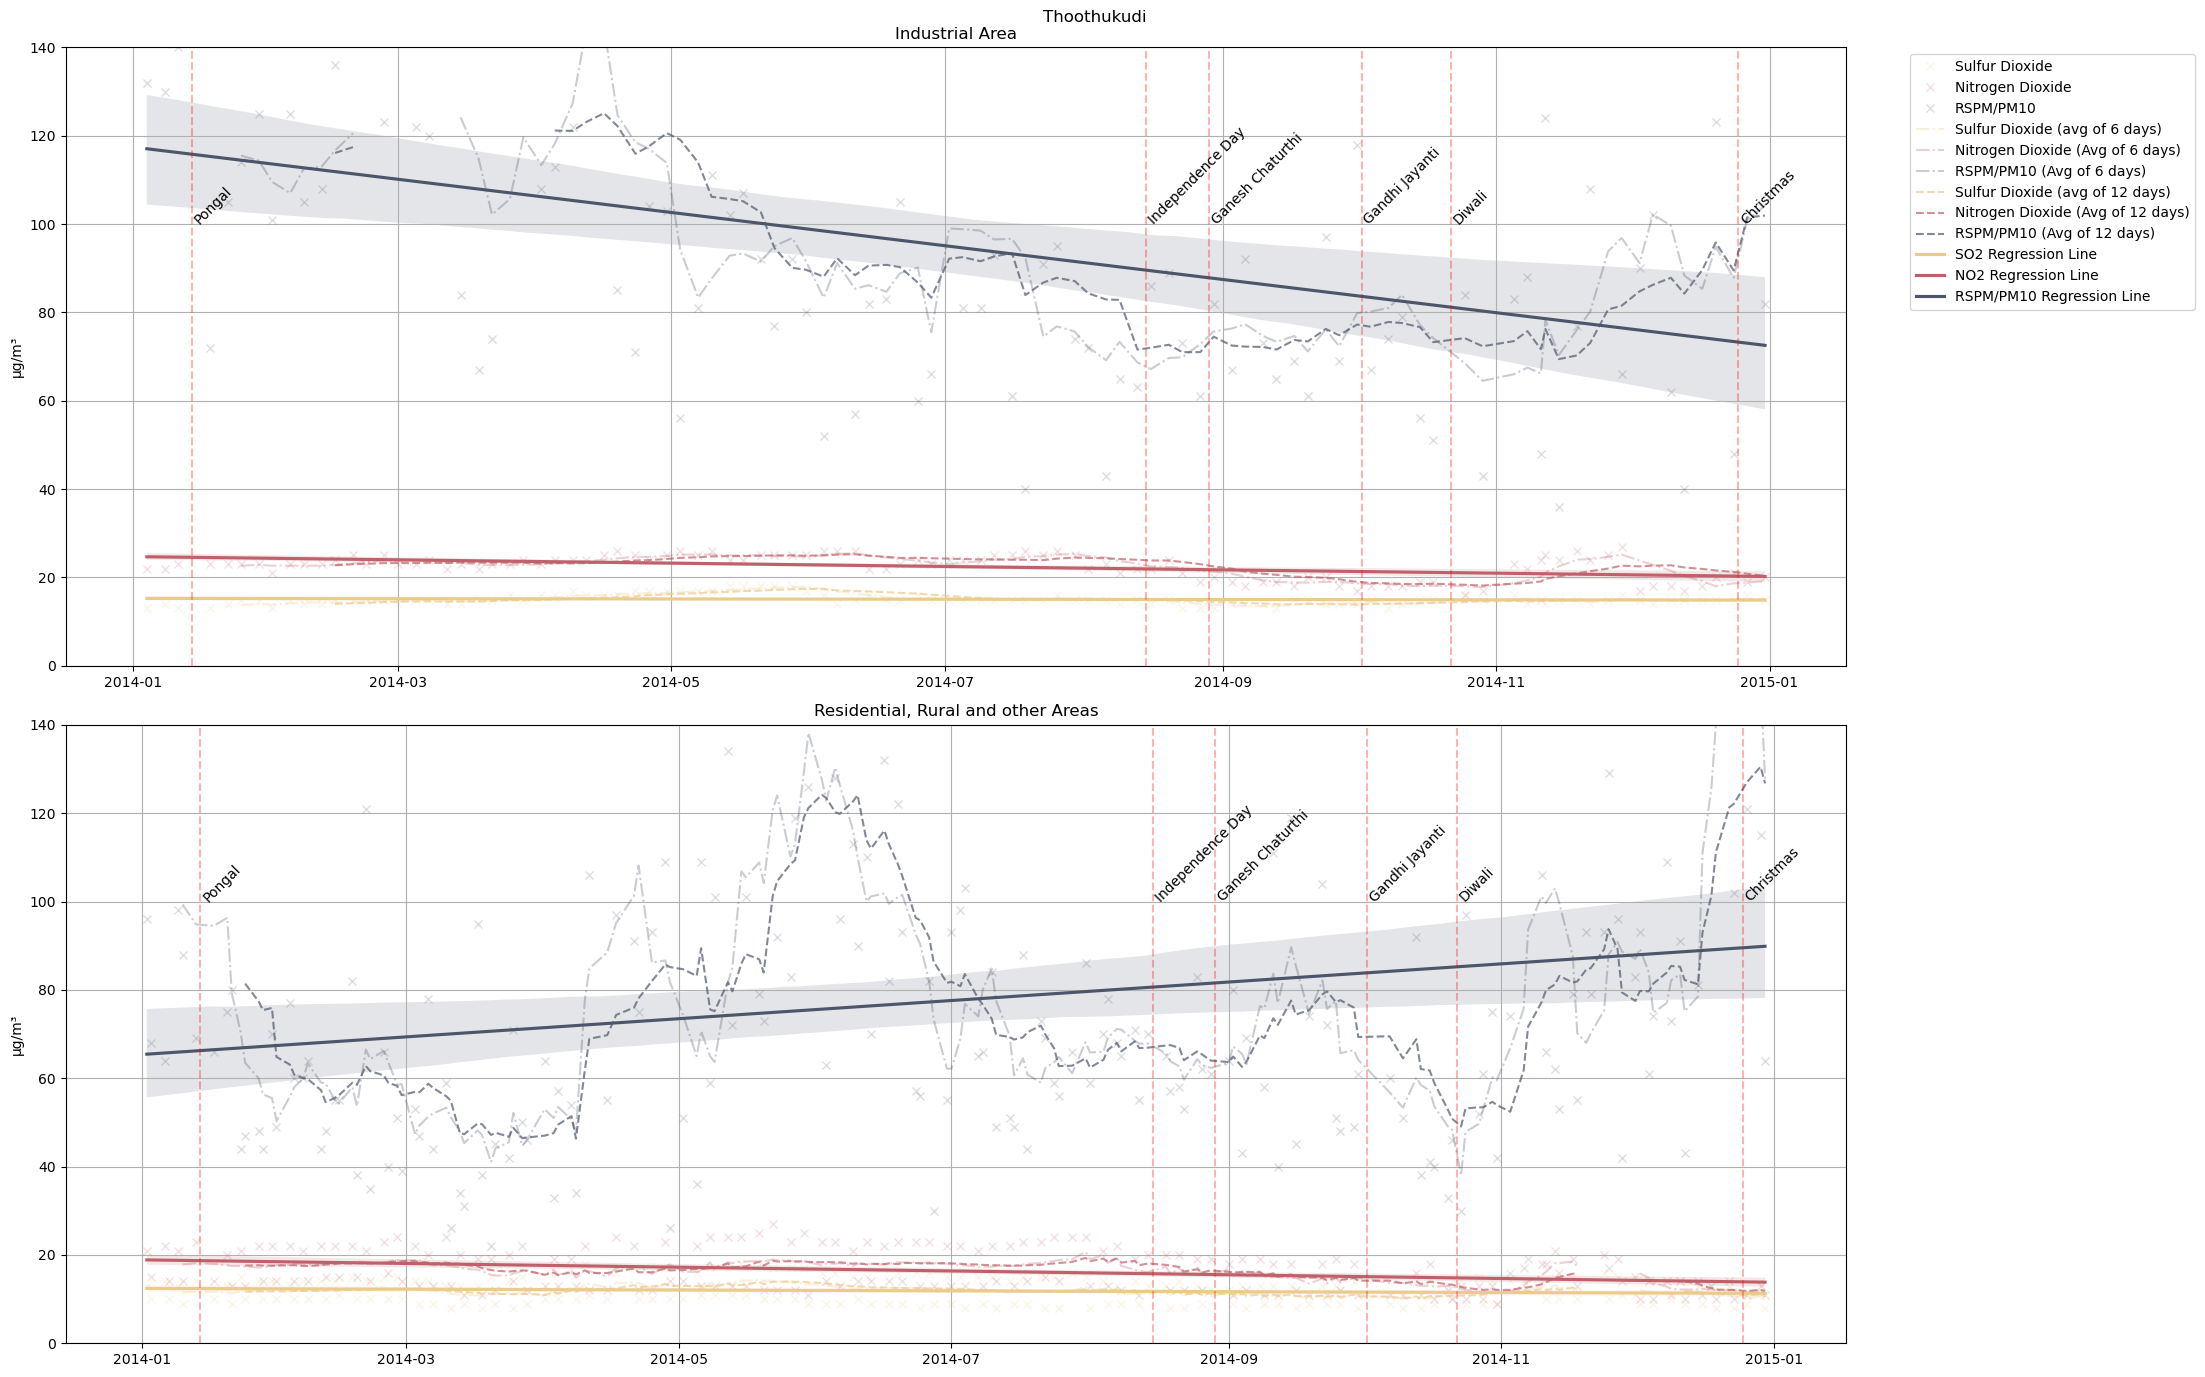

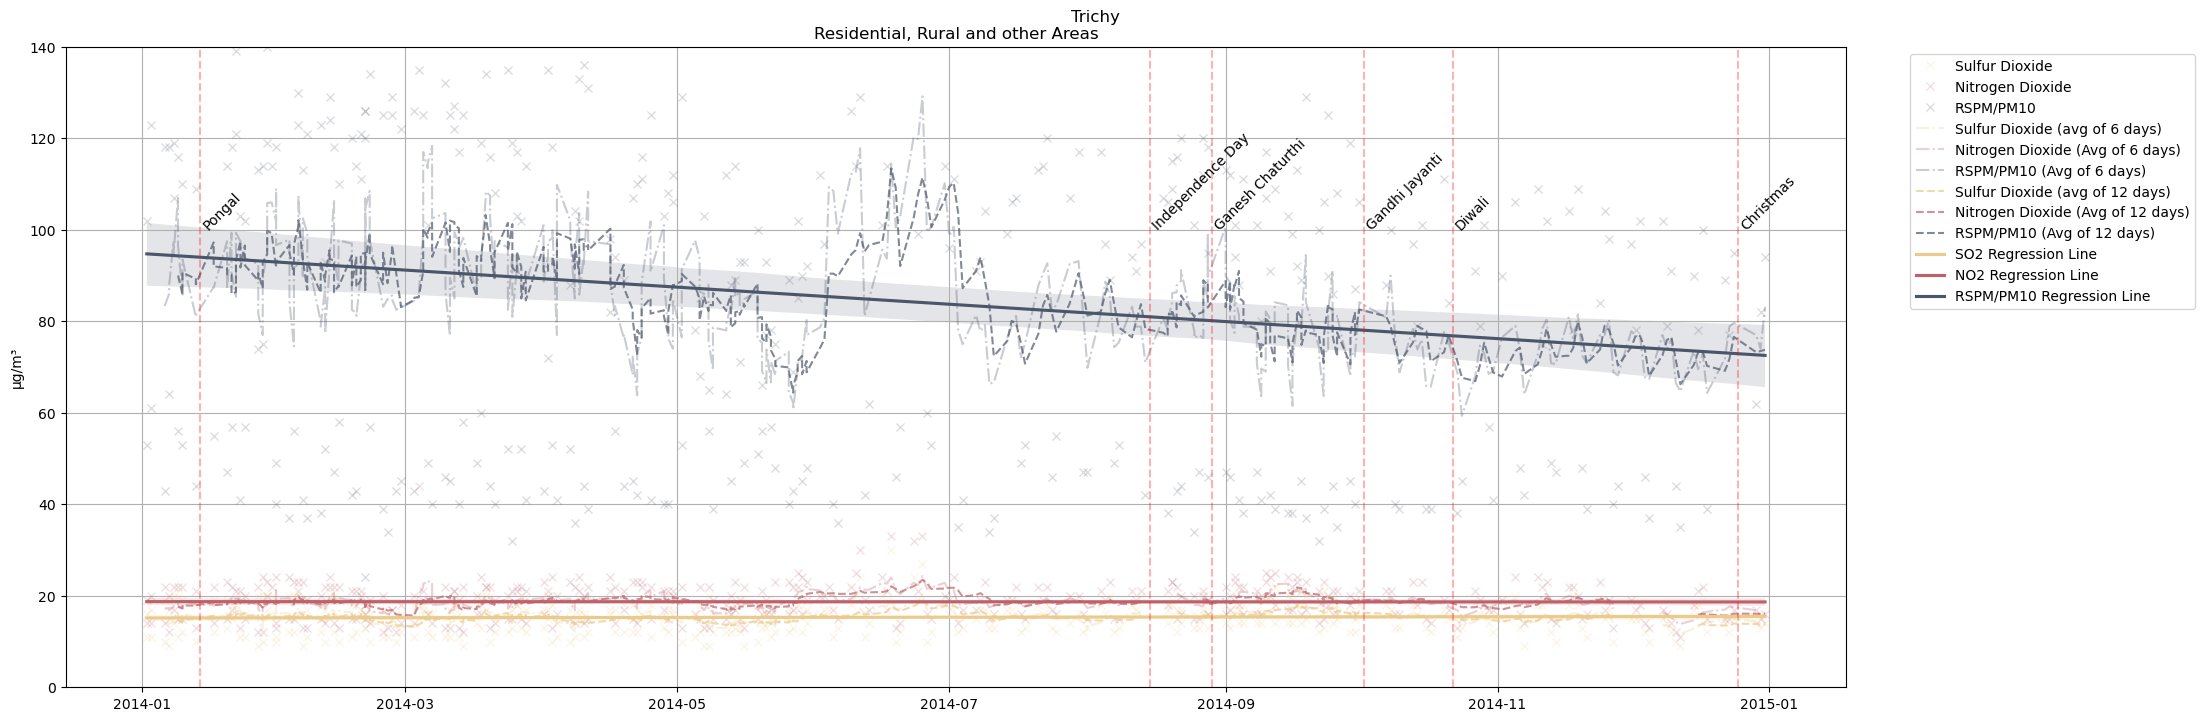

In [14]:
# ADD MORE IMPORTANT DATES
event_dates = {
    "Diwali": "2014-10-22",
    "Christmas": "2014-12-25",
    "Pongal": "2014-01-14",
    "Independence Day": "2014-08-15",
    "Ganesh Chaturthi": "2014-08-29",
    "Gandhi Jayanti": "2014-10-02",
}

from matplotlib.dates import date2num

def draw_vertical_lines(events,y_cord=50):
    for key,val in events.items():
        x_val = datetime.strptime(val, "%Y-%m-%d")
        plt.axvline(x=x_val, color='red', linestyle='--',alpha=.3,)
        plt.text(x_val, y_cord, key, color='black',rotation=45)        


def draw_(area,mark_alpha = 0.2,d3_alpha=0.3,reg_alpha=1,d7_alpha=.7):
    fig = plt.figure(figsize=(22,14))
    for i, (name, data_) in enumerate(data_by_area[area].groupby("loctype")):
        if len(data_)==0:
            continue
        plt.subplot(2,1,i+1)
        
        # Raw Data Points
        plt.plot(data_.date,data_.SO2, label="Sulfur Dioxide",color=so2_color,alpha=mark_alpha,marker='x',linestyle="")
        plt.plot(data_.date,data_.NO2, label= "Nitrogen Dioxide", color = no2_color,alpha=mark_alpha,marker='x',linestyle="")
        plt.plot(data_.date,data_["RSPM/PM10"],label="RSPM/PM10",alpha=mark_alpha,marker="x", color=pm10_color,linestyle="")


        # Average of 6 days 
        plt.plot(data_['date'], data_['SO2'].rolling(window=6).mean(), label="Sulfur Dioxide (avg of 6 days)", color=so2_color, alpha=d3_alpha,linestyle="-.")
        plt.plot(data_['date'], data_['NO2'].rolling(window=6).mean(), label="Nitrogen Dioxide (Avg of 6 days)", color=no2_color, alpha=d3_alpha,linestyle="-.")
        plt.plot(data_['date'],data_['RSPM/PM10'].rolling(window=6).mean() , label="RSPM/PM10 (Avg of 6 days)", color=pm10_color, alpha=d3_alpha,linestyle="-.")

        # Average of 14 Days
        plt.plot(data_['date'], data_['SO2'].rolling(window=12).mean(), label="Sulfur Dioxide (avg of 12 days)", color=so2_color, alpha=d7_alpha,linestyle="--")
        plt.plot(data_['date'], data_['NO2'].rolling(window=12).mean(), label="Nitrogen Dioxide (Avg of 12 days)", color=no2_color, alpha=d7_alpha,linestyle="--")
        plt.plot(data_['date'],data_['RSPM/PM10'].rolling(window=12).mean() , label="RSPM/PM10 (Avg of 12 days)", color=pm10_color, alpha=d7_alpha,linestyle="--")

        # Regression Line
        sns.regplot(x=date2num(data_['date']),y=data_['SO2'], ci=95,color=so2_color, line_kws={'alpha': reg_alpha},label="SO2 Regression Line", scatter=False)
        sns.regplot(x=date2num(data_['date']),y=data_['NO2'], ci=95,color=no2_color, line_kws={'alpha': reg_alpha},label="NO2 Regression Line", scatter=False)
        sns.regplot(x=date2num(data_['date']),y=data_['RSPM/PM10'], ci=95,color=pm10_color, line_kws={'alpha': reg_alpha},label="RSPM/PM10 Regression Line", scatter=False)
        


        plt.title(name)
        plt.ylabel("µg/m³")
        plt.ylim(0,140)
        plt.grid(True)

        if i==0:
            plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
        draw_vertical_lines(event_dates,100)
    plt.suptitle(area)
    plt.tight_layout()
    plt.show()

for area in data_by_area.keys():
    draw_(area)

## Heat Map of Correlations between SO2, NO2, Location Type & PM10.

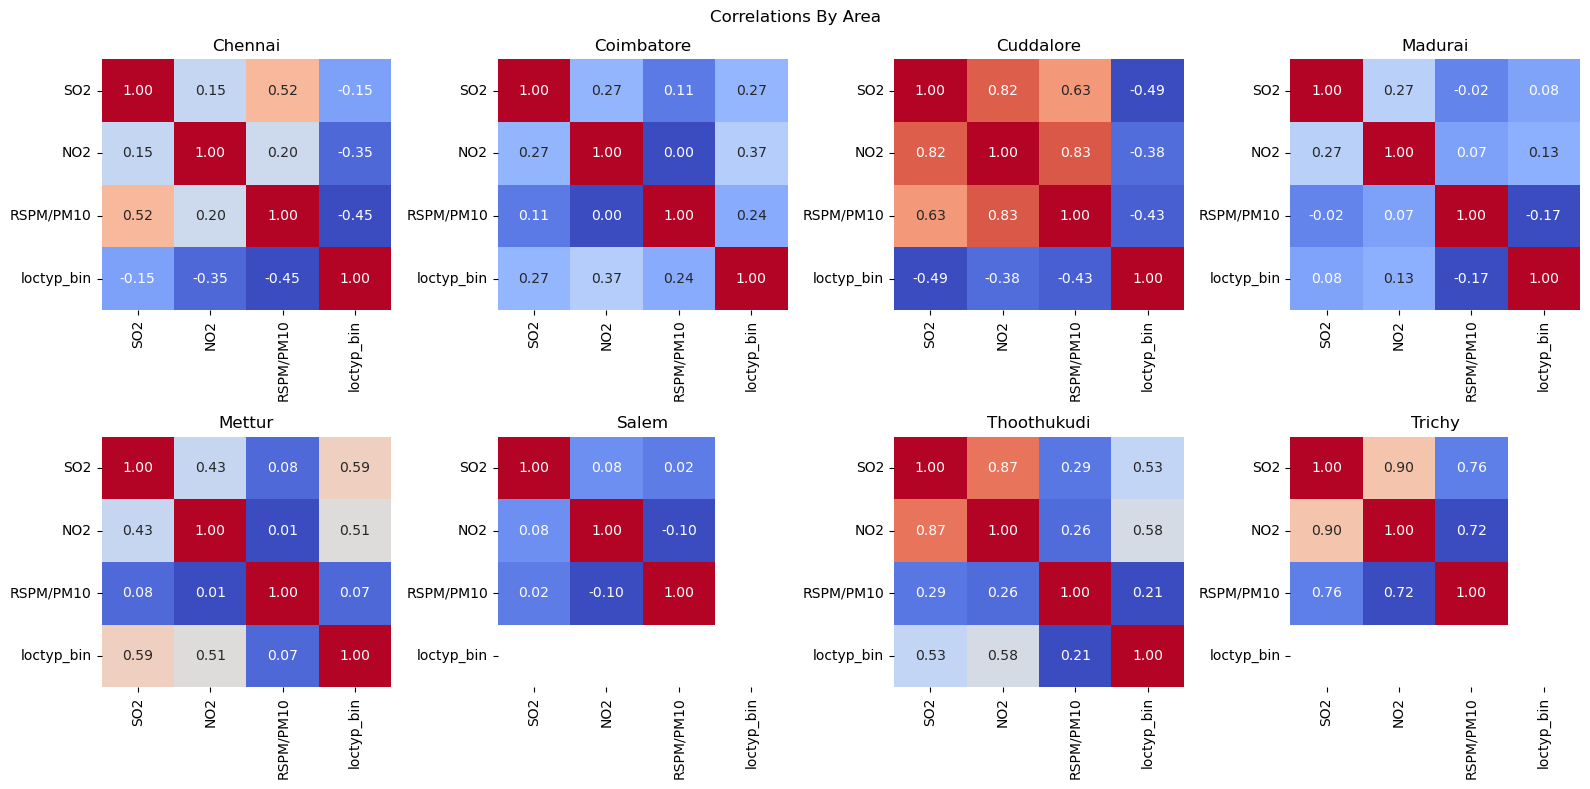

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

for i, area in enumerate(unique_areas):
    row, col = divmod(i, 4)  # Calculate the row and column for the current area
    ax = axes[row, col]  # Select the current subplot
    temp = data_by_area[area]
    if "loctyp_bin" not in data.columns:
        temp["loctyp_bin"] = temp["loctype"].apply(lambda x: 1 if x[0] == "I" else 0)
    corr_matrix = temp.corr(numeric_only=True)
    
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0, cbar=False, ax=ax)
    del temp
    ax.set_title(area)
plt.suptitle("Correlations By Area")
plt.tight_layout()
plt.show()

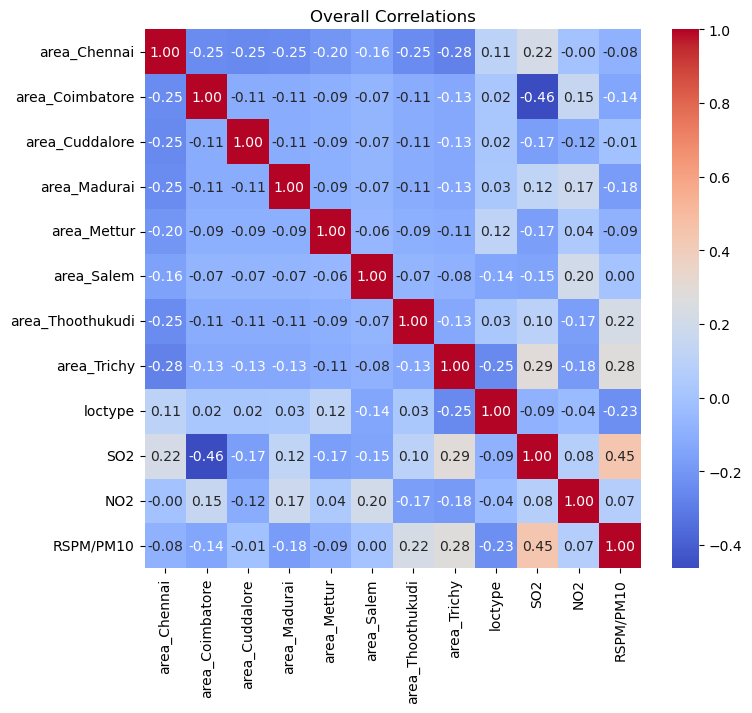

In [16]:
data["loctyp_bin"] = data["loctype"].apply(lambda x: 1 if x[0] == "I" else 0)

X = pd.get_dummies(data['area'], prefix='area')
X["loctype"] = data["loctyp_bin"]
X["SO2"] = data["SO2"]
X["NO2"] = data["NO2"]
X["RSPM/PM10"] = data["RSPM/PM10"]
fig = plt.figure(figsize=(8,7))
corr_matrix = X.corr(numeric_only=True)
del X
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0)
plt.title("Overall Correlations")
plt.show()

# 3) Building Predictive Model

In [19]:
# Drop NA rows
temp = data.dropna()
# One Hot Encoded Area
X = pd.get_dummies(temp['area'], prefix='area')
# One Hot Encded location type
X[["ind","res"]] = pd.get_dummies(temp["loctype"],prefix="is_indu")
# Month: int
X["month"] = temp["date"].dt.month
# Day of the month: int
X["day"] = temp["date"].dt.day
# Weekday: int
X["weekday"] = temp["date"].dt.weekday
X["SO2"] = temp["SO2"]
X["NO2"] = temp["NO2"]

Y = temp["RSPM/PM10"]
print(X.shape)
X.head()

(2862, 15)


area_Chennai  area_Coimbatore  area_Cuddalore  area_Madurai  area_Mettur  \
0             1                0               0             0            0   
1             1                0               0             0            0   
2             1                0               0             0            0   
3             1                0               0             0            0   
4             1                0               0             0            0   

   area_Salem  area_Thoothukudi  area_Trichy  ind  res  month  day  weekday  \
0           0                 0            0    1    0      1    2        3   
1           0                 0            0    1    0      1    7        1   
2           0                 0            0    1    0      1   21        1   
3           0                 0            0    1    0      1   23        3   
4           0                 0            0    1    0      1   28        1   

    SO2   NO2  
0  11.0  17.0  
1  13.0  17.0  
2  12.0  18.0  
3  15.0  16.0  
4  13.0  14.0

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=69420,shuffle=True)


model =  RandomForestRegressor(n_estimators=29).fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 14.235436152703626
Mean Squared Error: 421.36285674049424
R-squared (R2) Score: 0.5682210490123847


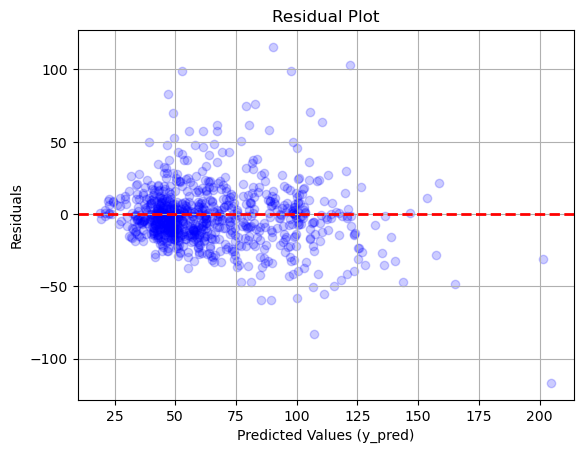

In [21]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, color='blue',alpha=0.2)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# 4) Insights and Findings